# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [113]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

$\color{Coral}{Ответ:}$ random - это генератор псевдо случайных чисел. Он берет некоторое начальное число (по умолчанию это текущее системное время) и при помощи алгоритма выдает псевдо случайные числа. Указывая seed, мы фиксируем это начальное число, в результате чего метод выдает одни и те же числа для указанного значения seed. Это необходимо для удобства при повторном запуске и проверке

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [115]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [116]:
np.random.seed(42)
random_numbers = np.random.randint(len(df_train), size=10)  # генерируем 10 случайных индексов

df_train.loc[random_numbers]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
860,Renault KWID RXT,2016,330000,20000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
5390,Maruti Ertiga ZDI Plus,2017,825000,79000,Diesel,Dealer,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5226,Hyundai Xcent 1.2 VTVT SX,2020,524000,32000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5191,Mahindra XUV500 W10 2WD,2015,850000,140000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
3772,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
3092,Toyota Innova 2.5 VX 7 STR,2010,515000,200000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
5734,Skoda Rapid 1.6 TDI Ambition Plus Alloy,2012,380000,145000,Diesel,Individual,Manual,First Owner,20.5 kmpl,1598 CC,103.5 bhp,250Nm@ 1500-2500rpm,5.0
6265,Toyota Innova 2.5 Z Diesel 7 Seater BS IV,2014,950000,80000,Diesel,Dealer,Manual,First Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
466,Honda City i VTEC VX,2015,900000,22000,Petrol,Individual,Manual,First Owner,17.4 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
5334,Maruti Vitara Brezza ZDi,2019,890000,9000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [117]:
df_test.head()  # первые пять

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [118]:
df_test.tail()  # последние пять

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [119]:
df_train.describe(include = 'all')  # основная статистика для трейна

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [120]:
df_test.describe(include = 'all')  # основная статистика для теста

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

* Для таблицы трейн

In [121]:
df_train.isnull().sum()  # количество пропусков по колонкам

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

* Для таблицы тест

In [122]:
df_test.isnull().sum()  # количество пропусков по колонкам

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [123]:
train_without_price = df_train.drop('selling_price', axis=1)  # исключаем целевую переменную

In [124]:
dup = train_without_price.duplicated()  # находим дубликаты
dup.value_counts()  # подсчитываем количество дубликатов

False    5840
True     1159
dtype: int64

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [125]:
df_train[dup]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [126]:
train_without_price = train_without_price.drop_duplicates()  # удаляем дубликаты
df_train = pd.concat([train_without_price, df_train['selling_price']], axis=1, join="inner")  # возвращаем целевую переменную

df_train.shape

(5840, 13)

In [127]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [128]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [129]:
import re

Обработаем столбец mileage 
* для df_train

In [130]:
new_mileage = []

for mil in df_train['mileage']:
   if type(mil) == str:  # способ обходить столбец, не трогая пустые значения
     new_mileage.append(float('.'.join(re.findall('\d+', mil))))  # выделяем из строки числовую часть
   else:  
     new_mileage.append(mil)  # NaN будем оставлять нетронутыми

df_train['mileage'] = new_mileage

* для df_test

In [131]:
new_mileage = []

for mil in df_test['mileage']:
   if type(mil) == str:  # способ обходить столбец, не трогая пустые значения
     new_mileage.append(float('.'.join(re.findall('\d+', mil))))  # выделяем из строки числовую часть
   else:  
     new_mileage.append(mil)  # NaN будем оставлять нетронутыми

df_test['mileage'] = new_mileage

Обработаем столбец engine 

* для df_train

In [132]:
new_engine = []

for eng in df_train['engine']:
   if type(eng) == str:  # способ обходить столбец, не трогая пустые значения
     new_engine.append(float('.'.join(re.findall('\d+', eng))))  # выделяем из строки числовую часть
   else:  
     new_engine.append(eng)  # NaN будем оставлять нетронутыми

df_train['engine'] = new_engine

*  для df_test

In [133]:
new_engine = []

for eng in df_test['engine']:
   if type(eng) == str:  # способ обходить столбец, не трогая пустые значения
     new_engine.append(float('.'.join(re.findall('\d+', eng))))  # выделяем из строки числовую часть
   else:  
     new_engine.append(eng)  # NaN будем оставлять нетронутыми

df_test['engine'] = new_engine

Обработаем столбец max_power 
* для df_train

In [134]:
new_max_power = []

for power in df_train['max_power']:
  if type(power) == str:  # способ обходить столбец, не трогая пустые значения
     numb = '.'.join(re.findall('\d+', power))  # выделяем из строки числовую часть
     if numb == '':  # обрабатываем значения без чисел 
       # выведем такие случаи на экран
       print(power)
       new_max_power.append(np.nan)
     elif '.' in numb:  # обрабатываем дробные числа
       new_max_power.append(float(numb))  
     else:  # обрабатываем целые числа
       new_max_power.append(float(int(numb)))
  else:  # NaN будем оставоять нетронутыми
     new_max_power.append(power) 

df_train['max_power'] = new_max_power

 bhp


* для df_test

In [135]:
new_max_power = []

for power in df_test['max_power']:
   if type(power) == str:  # способ обходить столбец, не трогая пустые значения
     numb = '.'.join(re.findall('\d+', power))  # выделяем из строки числовую часть
     if '.' in numb:  # отдельно обрабатываем дробные числа
       new_max_power.append(float(numb))  
     else:  # обрабатываем целые числа
       new_max_power.append(float(int(numb)))
   else:  
     new_max_power.append(power)  # NaN будем оставоять нетронутыми

df_test['max_power'] = new_max_power

Обработаем столбец torque для df_train

* Выделяем новый столбец torque

In [136]:
new_torque = []

for torq in df_train['torque']:
  if type(torq) == str:  # способ обходить столбец, не трогая пустые значения
    torque = re.findall('\d+[.,\d+]*[ Nkg@mn]+', torq)  # находим все torque
    curr_torque = torque[0]
    if 'Nm' not in curr_torque and 'nm' not in curr_torque and 'kgm' not in curr_torque: # если единицы измерения отсутствуют
      unit = re.findall('[NnKkGg]+[mM]', torq)  # находим единицы измерения
      if unit != []:  # если измерения нашлись
        curr_torque = torque[0] + unit[0] # объединяем измерение и показатель
    new_torque.append(curr_torque)
  else:  # сохраняем пустые значения (nan)
    new_torque.append(torq)

* Выделяем новый столбец max_torque_rpm

Посмотрим если ли другие единицы измерения для max_torque_rpm помимо rpm

In [137]:
for torq in df_train['torque']:
  if type(torq) == str and 'rpm' not in torq and 'RPM' not in torq:
    print(torq)

400Nm
400Nm
510@ 1600-2400
135.4Nm@ 2500
135.4Nm@ 2500
190Nm@ 2000-3000
210 / 1900
210 / 1900
210 / 1900
210 / 1900
135.4Nm@ 2500
210 / 1900
210 / 1900
210 / 1900
400Nm


Их нет

In [138]:
new_max_torque_rpm = []

for torq in df_train['torque']:
  if type(torq) == str:  # способ обходить столбец, не трогая пустые значения
    max_torque = re.findall('[\d+,]{4}[\d+,. +\/-]*', torq)  # находим все max_torque_rpm 
    if max_torque == []:  # есть 3 объекта с отсутствующим max_torque_rpm показателем
      curr_max_torque = np.nan
    else:  # сохраняем найденное значение
      curr_max_torque = max_torque[0]
    new_max_torque_rpm.append(curr_max_torque)
  else:  # сохраняем пустые значения (nan)
    new_max_torque_rpm.append(torq)

Обработаем данные для будущего столбца torque, приведя их в одной единице измерения Nm

In [139]:
processed_torque = []

for torq in new_torque:
  if type(torq) == str:
    if 'N' in torq or 'n' in torq: # выбираем изначения в измерениях Nm
      numb = '.'.join(re.findall('\d+', torq))  # выделяем из строки числовую часть
      if '.' in numb:  # обрабатываем дробные числа
        processed_torque.append(float(numb))
      else:  # обрабатываем целые числа
        processed_torque.append(float(int(numb)))
    elif 'k' in torq or 'K' in torq: # выбираем значения в измерениях kgm
      numb = '.'.join(re.findall('\d+', torq))  # выделяем из строки числовую часть
      if '.' in numb:  # выбираем дробные числа
        numb = float(numb)
      else:  # выбираем целые числа
        numb = float(int(numb))
      numb = numb * 9.80665 # переводим kgm в Nm
      processed_torque.append(float(numb))
    else: # обрабатываем значения без единиц измерения
      print(torq)  # трехзначные числа, как правило соответствуют единице измерения Nm
      numb = '.'.join(re.findall('\d+', torq))  # выделяем из строки числовую часть
      processed_torque.append(float(int(numb)))
  else:  
    processed_torque.append(torq)  # NaN будем оставоять нетронутыми

250@ 
510@ 
210 
210 
210 
210 
210 
210 
210 


Обработаем данные для будущего столбца max_torque_rpm. Так как некоторые значения указаны в виде диапазона, для таких случаев для удобства сохраним их как среднее значение диапазона

In [140]:
processed_max_torque_rpm = []

for torq in new_max_torque_rpm:
  if type(torq) == str:  
    if '-' not in torq and '/' not in torq: # обрабатываем обычные числа
      numb = int(''.join(re.findall('\d+', torq)))  # выделяем из строки числовую часть
    elif '/' in torq: # обрабатываем диапозоны вида +/-
      numbs = re.findall('[\d,]+', torq)  # сохраняем все числа
      numb = int(''.join(re.findall('\d+', numbs[0])))  # первое число будет средним диапазона
    else: # обрабатываем диапазоны
      # разделим диапазоны на два числа
      range_of_numbs = re.findall('[\d+,]+', torq)
      first_numb = int(''.join(re.findall('\d+', range_of_numbs[0])))
      second_numb = int(''.join(re.findall('\d+', range_of_numbs[1])))
      numb = int((first_numb + second_numb) / 2) # сохраним среднее диапазона
    processed_max_torque_rpm.append(numb)
  else:  # сохраняем пустые значения (nan)
    processed_max_torque_rpm.append(torq)

Перезапишем столбцы для df_train

In [141]:
df_train['torque'] = processed_torque
df_train['max_torque_rpm'] = processed_max_torque_rpm

In [142]:
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000000,5.0,450000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000000,5.0,370000,2000.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,225000,2250.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.776475,5.0,130000,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.750000,5.0,440000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,120000,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.000000,5.0,260000,3500.0
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.700000,5.0,320000,4000.0
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.359600,5.0,135000,2325.0


Проделаем все то же самое для столбца torque таблицы тест

* Соберем значения для будущего столбца torque

In [143]:
new_torque_test = []

for torq in df_test['torque']:
  if type(torq) == str:  # способ обходить столбец, не трогая пустые значения
    torque = re.findall('\d+[.,\d+]*[ Nkg@mn]+', torq)  # находим все torque
    if torque == []:  # для строки '110(11.2)@ 4800'
      torque = re.findall('\d+', torq)
    curr_torque = torque[0]
    if 'Nm' not in curr_torque and 'nm' not in curr_torque and 'kgm' not in curr_torque: # если единицы измерения отсутствуют
      unit = re.findall('[NnKkGg]+[mM]', torq)  # находим единицы измерения
      if unit != []:  # если измерения нашлись
        curr_torque = torque[0] + unit[0] # объединяем измерение и показатель
    new_torque_test.append(curr_torque)
  else:  # сохраняем пустые значения (nan)
    new_torque_test.append(torq)

* Преведем все данные значения к одной единице измерения (Nm)

In [144]:
processed_torque_test = []

for torq in new_torque_test:
  if type(torq) == str:
    if 'N' in torq or 'n' in torq: # выбираем изначения в измерениях Nm
      numb = '.'.join(re.findall('\d+', torq))  # выделяем из строки числовую часть
      if '.' in numb:  # обрабатываем дробные числа
        processed_torque_test.append(float(numb))
      else:  # обрабатываем целые числа
        processed_torque_test.append(float(int(numb)))
    elif 'k' in torq or 'K' in torq: # выбираем значения в измерениях kgm
      numb = '.'.join(re.findall('\d+', torq))  # выделяем из строки числовую часть
      if '.' in numb:  # выбираем дробные числа
        numb = float(numb)
      else:  # выбираем целые числа
        numb = float(int(numb))
      numb = numb * 9.80665 # переводим kgm в Nm
      processed_torque_test.append(float(numb))
    else: # обрабатываем значения без единиц измерения
      print(torq)  # трехзначные числа, как правило соответствуют единице измерения Nm
      numb = '.'.join(re.findall('\d+', torq))  # выделяем из строки числовую часть
      processed_torque_test.append(float(int(numb)))
  else:  
    processed_torque_test.append(torq)  # NaN будем оставоять нетронутыми

110


* Соберем значения для будущего столбца max_torque_rpm 

In [145]:
new_max_torque_rpm_test = []

for torq in df_test['torque']:
  if type(torq) == str:  # способ обходить столбец, не трогая пустые значения
    max_torque = re.findall('[\d+,]{4}[\d+,. +\/-]*', torq)  # находим все max_torque_rpm 
    if max_torque == []:  # есть 3 объекта с отсутствующим max_torque_rpm показателем
      curr_max_torque = np.nan
    else:  # сохраняем найденное значение
      curr_max_torque = max_torque[0]
    new_max_torque_rpm_test.append(curr_max_torque)
  else:  # сохраняем пустые значения (nan)
    new_max_torque_rpm_test.append(torq)

Так же обработаем данные для будущего столбца max_torque_rpm таблицы тест, в члучае диапозонов сохранив их среднее

In [146]:
processed_max_torque_rpm_test = []

for torq in new_max_torque_rpm_test:
  if type(torq) == str:  
    if '-' not in torq and '/' not in torq: # обрабатываем обычные числа
      numb = int(''.join(re.findall('\d+', torq)))  # выделяем из строки числовую часть
    elif '/' in torq: # обрабатываем диапозоны вида +/-
      numbs = re.findall('[\d,]+', torq)  # сохраняем все числа
      numb = int(''.join(re.findall('\d+', numbs[0])))  # первое число будет средним диапазона
    else: # обрабатываем диапазоны
      # разделим диапазоны на два числа
      range_of_numbs = re.findall('[\d+,]+', torq)
      first_numb = int(''.join(re.findall('\d+', range_of_numbs[0])))
      second_numb = int(''.join(re.findall('\d+', range_of_numbs[1])))
      numb = int((first_numb + second_numb) / 2) # сохраним среднее диапазона
    processed_max_torque_rpm_test.append(numb)
  else:  # сохраняем пустые значения (nan)
    processed_max_torque_rpm_test.append(torq)

Перезапишем данные для таблицы тест

In [147]:
df_test['torque'] = processed_torque_test
df_test['max_torque_rpm'] = processed_max_torque_rpm_test

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



Вспомним в каких колонках имеются пропуски

In [148]:
df_train.isnull().sum()  # количество пропусков по колонкам

name                0
year                0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           186
engine            186
max_power         184
torque            187
seats             186
selling_price       0
max_torque_rpm    190
dtype: int64

In [149]:
df_test.isnull().sum()  # количество пропусков по колонкам

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
torque            19
seats             19
max_torque_rpm    23
dtype: int64

Найдем медианы таблицы трейн и заполним пропуски сразу для двух таблиц

In [150]:
mileage_filler = df_train['mileage'].median()
df_train['mileage'] = df_train['mileage'].fillna(mileage_filler)
df_test['mileage'] = df_test['mileage'].fillna(mileage_filler)

engine_filler = df_train['engine'].median()
df_train['engine'] = df_train['engine'].fillna(engine_filler)
df_test['engine'] = df_test['engine'].fillna(engine_filler)

max_power_filler = df_train['max_power'].median()
df_train['max_power'] = df_train['max_power'].fillna(max_power_filler)
df_test['max_power'] = df_test['max_power'].fillna(max_power_filler)

torque_filler = df_train['torque'].median()
df_train['torque'] = df_train['torque'].fillna(torque_filler)
df_test['torque'] = df_test['torque'].fillna(torque_filler)

seats_filler = df_train['seats'].median()
df_train['seats'] = df_train['seats'].fillna(seats_filler)
df_test['seats'] = df_test['seats'].fillna(seats_filler)

max_torque_rpm_filler = df_train['max_torque_rpm'].median()
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].fillna(max_torque_rpm_filler)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].fillna(max_torque_rpm_filler)

Проверим начилие пропусков

In [151]:
df_train.isnull().sum()  # количество пропусков по колонкам

name              0
year              0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
selling_price     0
max_torque_rpm    0
dtype: int64

In [152]:
df_test.isnull().sum()  # количество пропусков по колонкам

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [153]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# также приведем столбец max_torque_rpm к int
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].astype(int)
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].astype(int)

In [154]:
print("<Потому что количество сидений привязано к классу автомобиля. Увеличение или уменьшение их числа не делает автомобиль хуже/лучше, просто меняется тип авто>")

<Потому что количество сидений привязано к классу автомобиля. Увеличение или уменьшение их числа не делает автомобиль хуже/лучше, просто меняется тип авто>


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

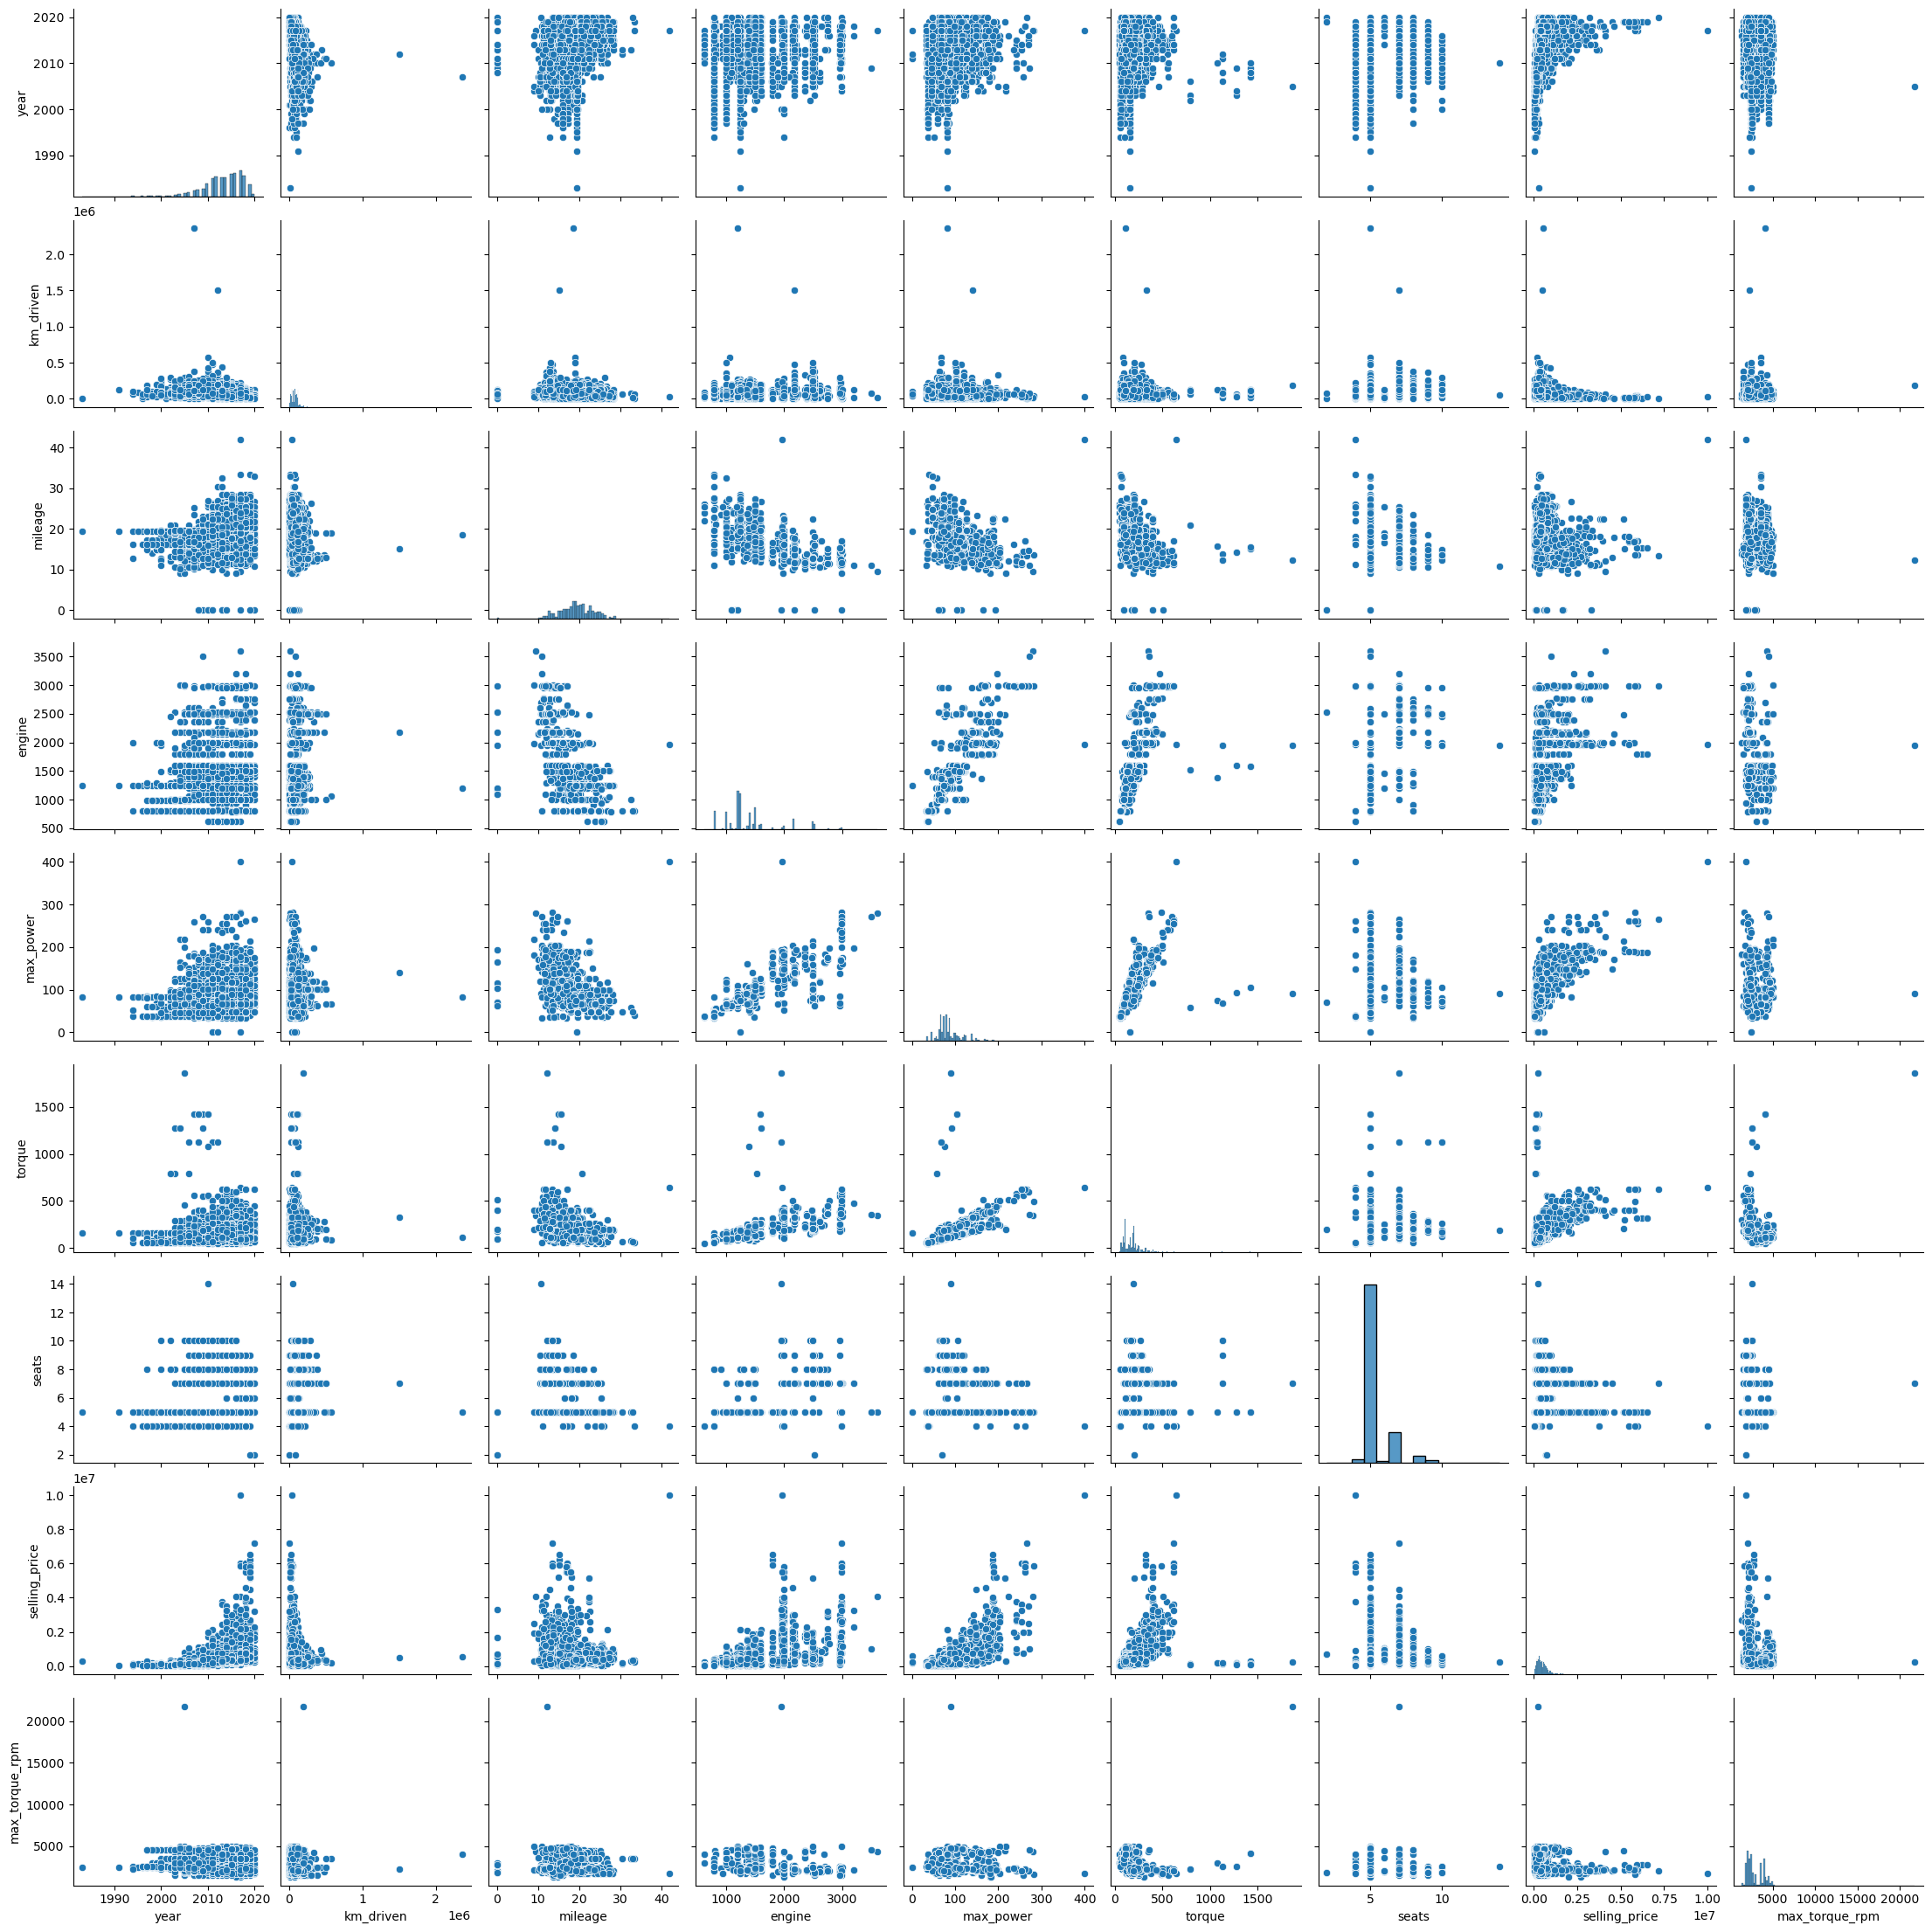

In [45]:
import seaborn as sns

sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Связь с целевой переменной:

* Чем новее машина, тем больше цена (экспоненциальная зависимость?)
* Чем меньше пробег, тем больше цена (экспоненциальная зависимость?)
* Чем выше показатели engine, max_power и torque, чем выше цена

У некоторых признаков имеется выраженная корреляция:
* torque и max_power
* max_power и engine 
* torque и engine 

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

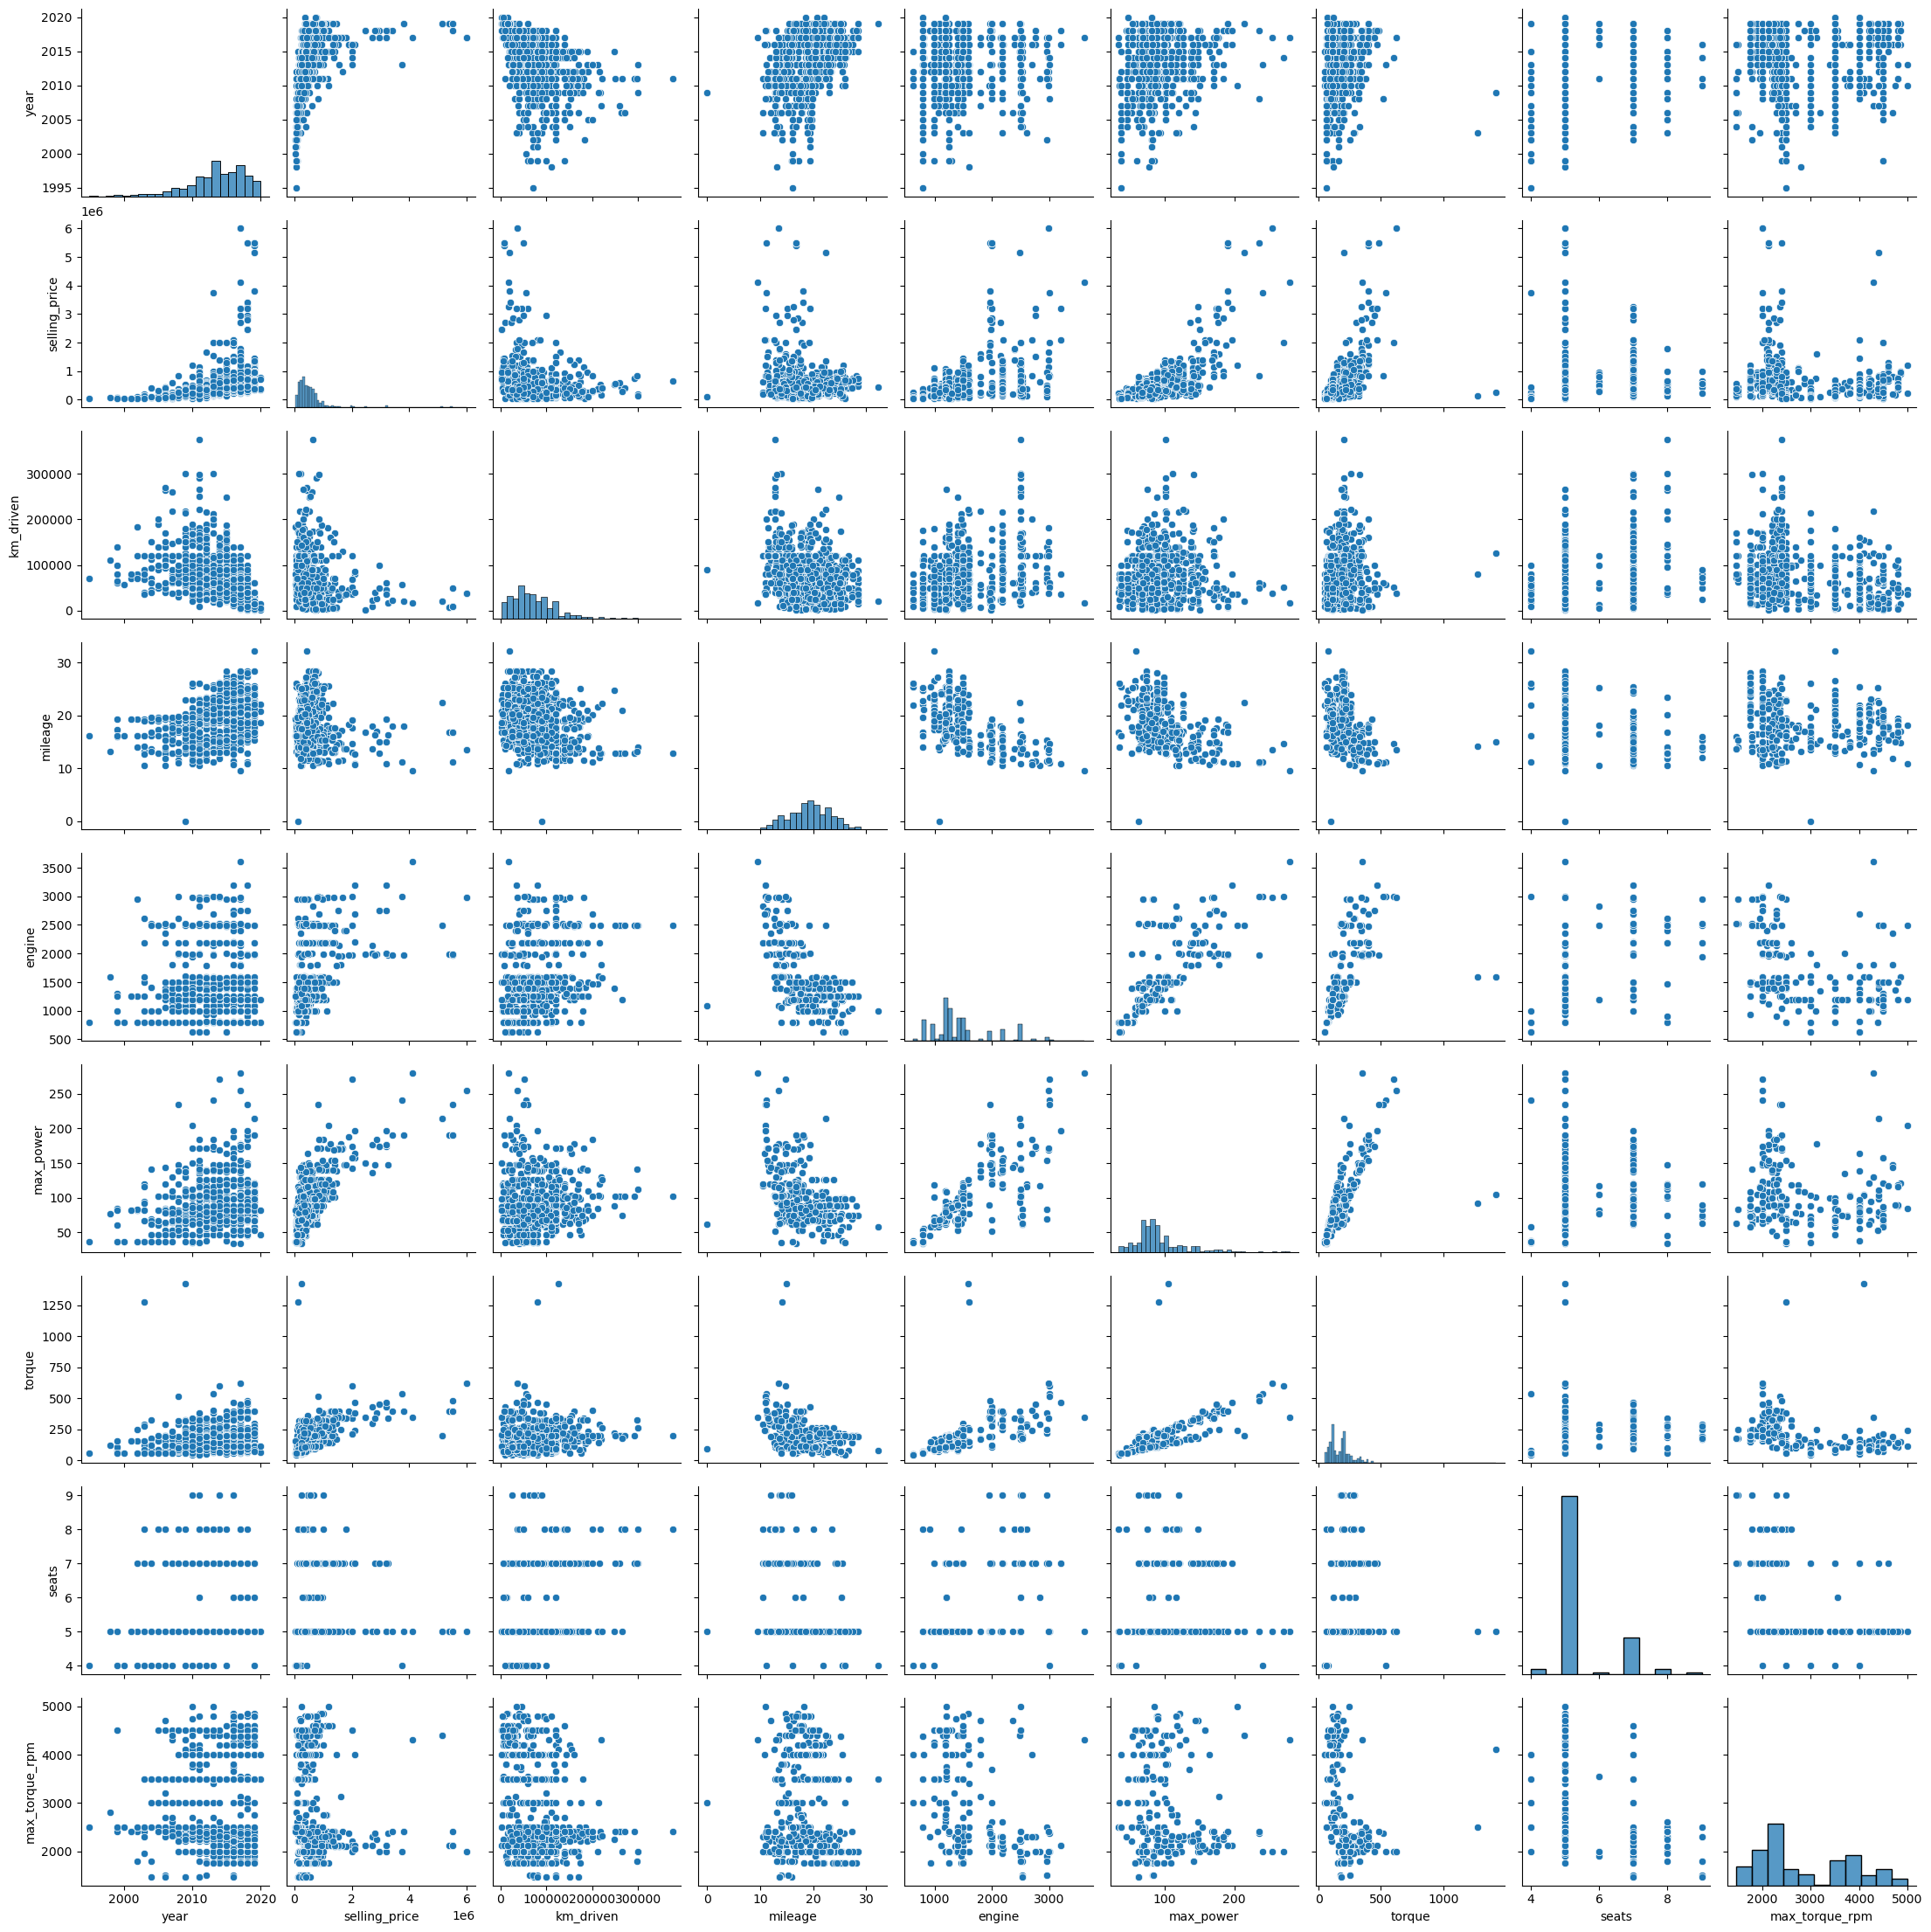

In [46]:
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [155]:
df_train.dtypes

name               object
year                int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine              int64
max_power         float64
torque            float64
seats               int64
selling_price       int64
max_torque_rpm      int64
dtype: object

In [156]:
numeric_df = df_train.select_dtypes(['int64', 'float64'])
numeric_df

,year,km_driven,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.000000,5,450000,2000
1,2014,120000,21.14,1498,103.52,250.000000,5,370000,2000
2,2010,127000,23.00,1396,90.00,219.668960,5,225000,2250
3,2007,120000,16.10,1298,88.20,112.776475,5,130000,4500
4,2017,45000,20.14,1197,81.86,113.750000,5,440000,4000
...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,5,120000,3000
5836,2013,50000,18.90,998,67.10,90.000000,5,260000,3500
5837,2013,110000,18.50,1197,82.85,113.700000,5,320000,4000
5838,2007,119000,16.80,1493,110.00,235.359600,5,135000,2325


<AxesSubplot:>

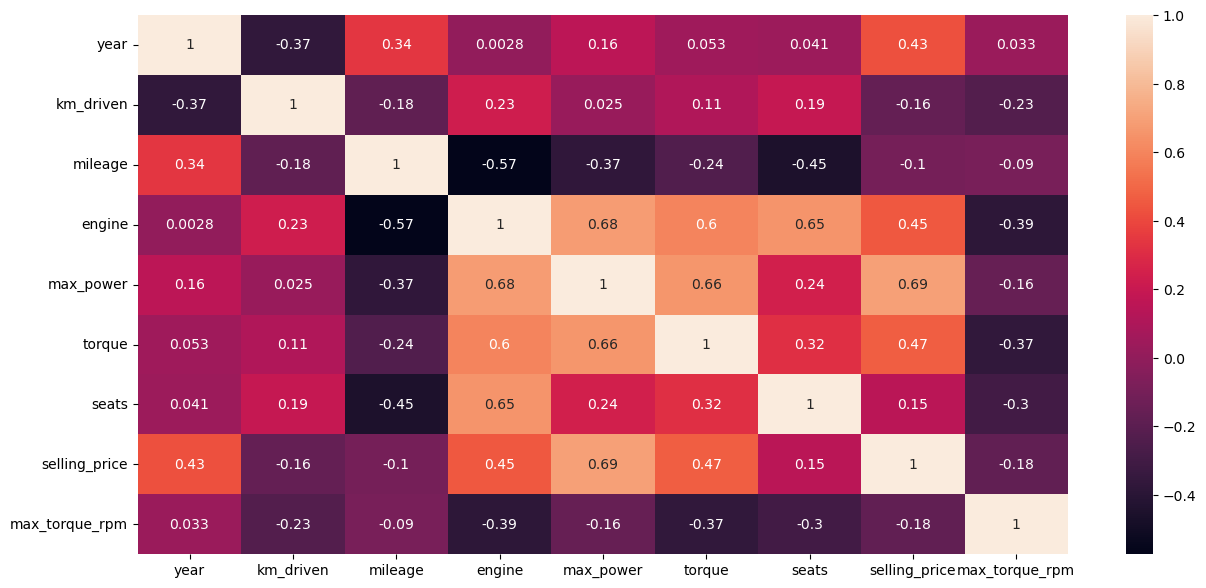

In [49]:
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(),  annot = True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

$\color{Coral}{Ответы:}$

1) Наиболее сильно скоррелированы max_power и selling_price

2) Сильная положительная зависимость наблюдается между:
* engine и max_power
* engine и torque
* engine и seats
* max_power и selling_price
* max_power и torque

3) Корреляция недостаточно выражена, чтобы делать такие выводы. Также не выражена взаимосвязь и на графике распределения этих двух признаков для таблицы трейн (однако, у таблицы тест она более заметна)


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

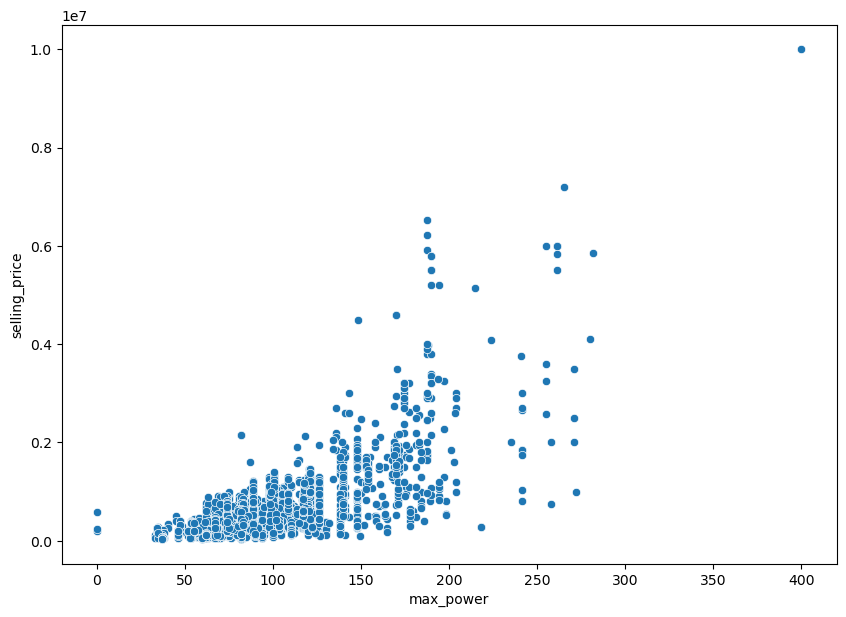

In [50]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_train, x="max_power", y="selling_price")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Можем посмотреть на зависимость цены от категориальных признаков:

* Количество сидений

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

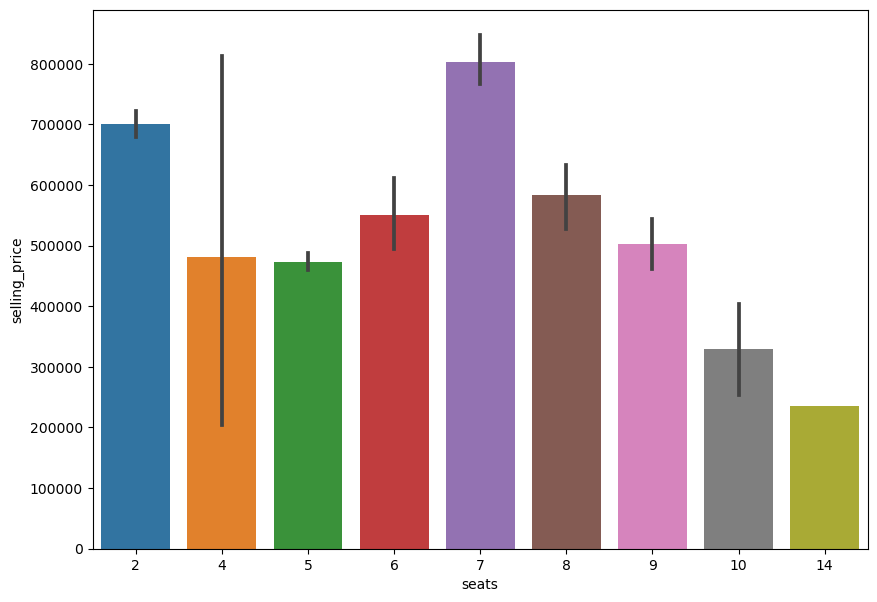

In [51]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_train, x="seats", y='selling_price') 

Самые большие разбросы цены у четырехместных машин. Наибольшая цена в среднем у семиместных и двухместных автомобилей

* Марка машины

In [157]:
df_name = df_train[['name', 'selling_price']].copy()

# вместо полной модели машины, сохраним только ее марку

brand = []
for name in df_name['name']:
  full_name = name.split()
  brand.append(full_name[0])

df_name['name'] = brand

<AxesSubplot:xlabel='selling_price', ylabel='name'>

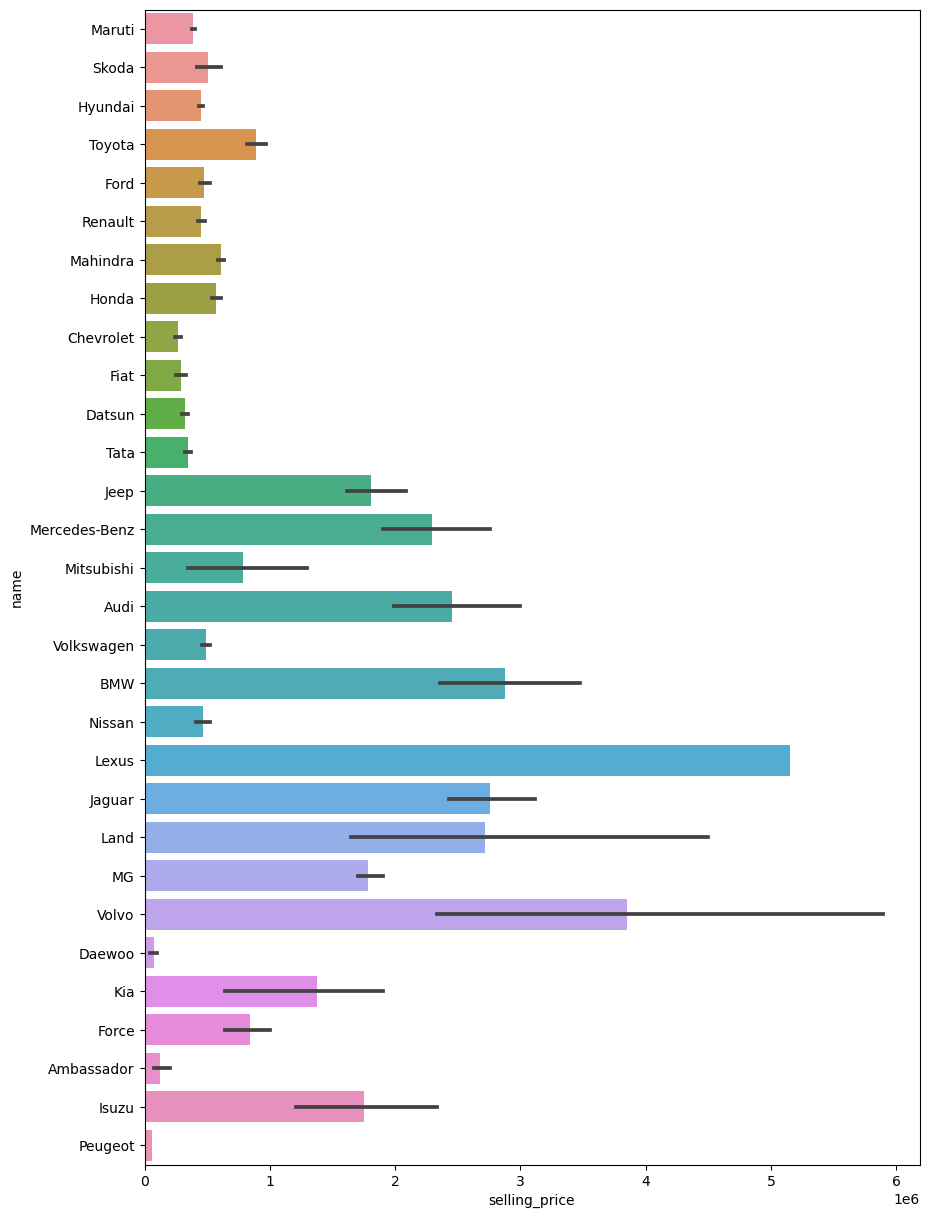

In [158]:
# your code here
plt.figure(figsize=(10, 15))
sns.barplot(data=df_name, y="name", x="selling_price")

Наиболее дорогая марка в среднем - это лексус. Однако у вольво имеются большие выбросы (возможно, у них есть линейка премиальных моделей)

* Тип топлива

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

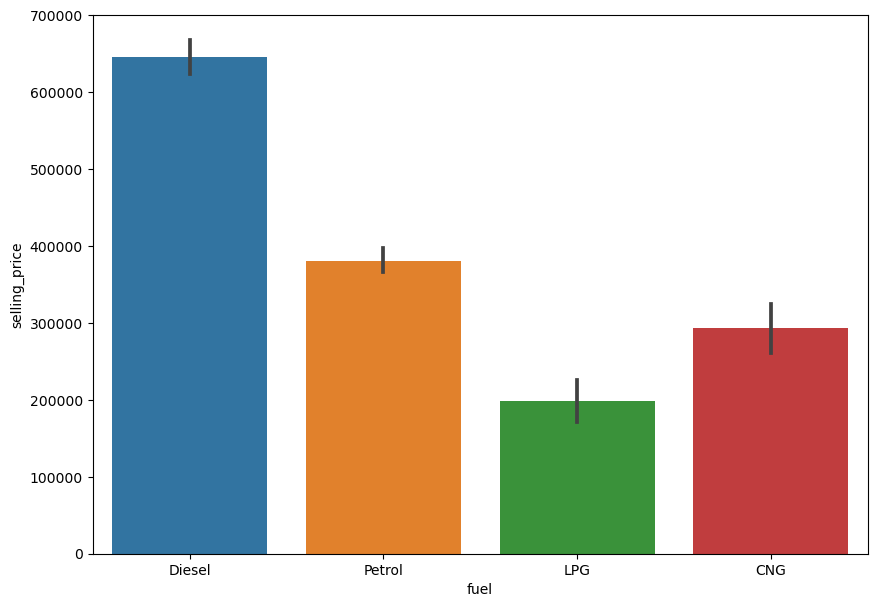

In [54]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_train, x="fuel", y="selling_price")

* Тип продавца

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

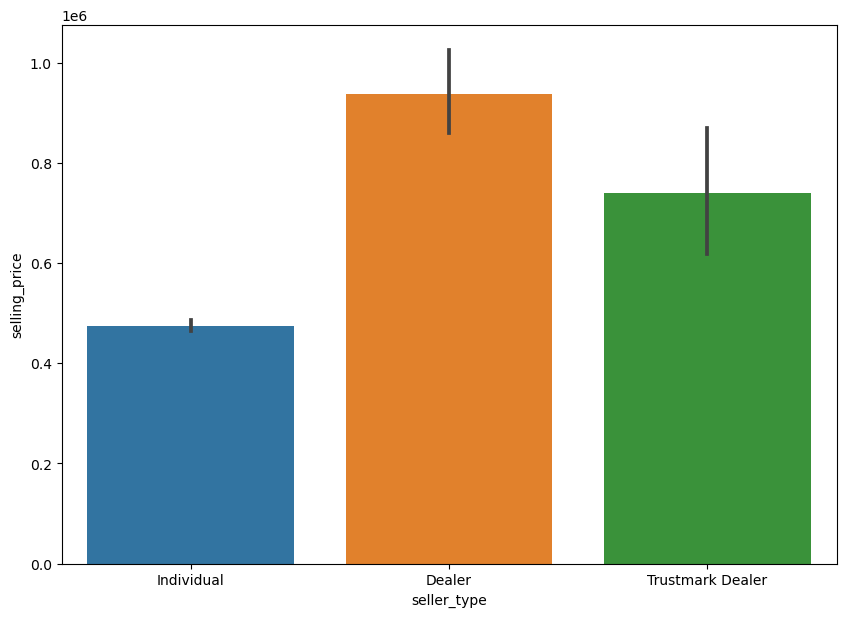

In [55]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_train, x="seller_type", y="selling_price")

* Коробка передач

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

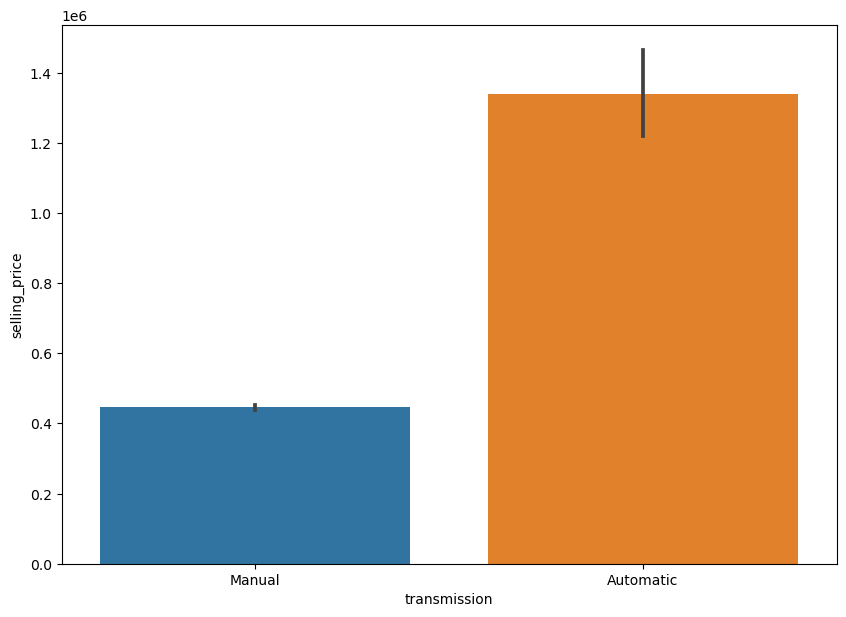

In [56]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_train, x="transmission", y="selling_price")

* Владелец

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

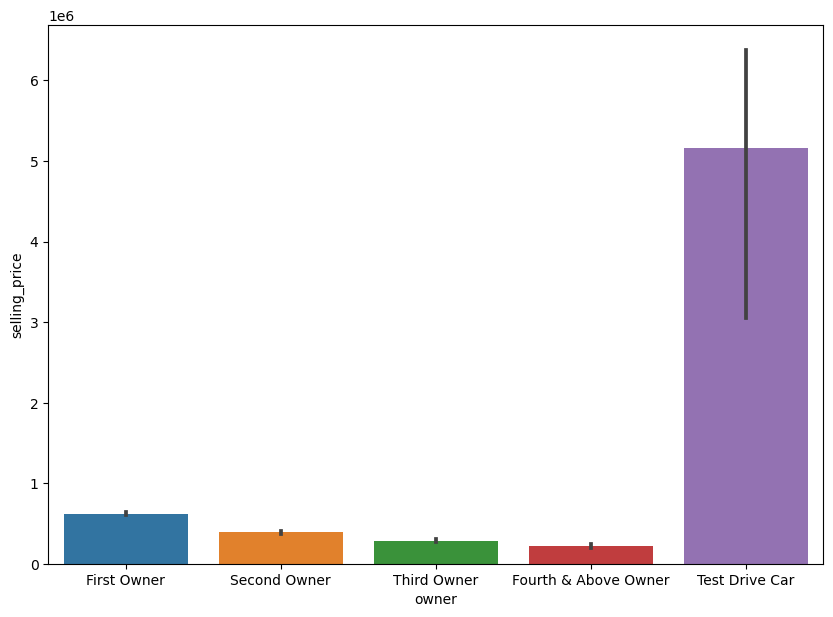

In [57]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_train, x="owner", y="selling_price")

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [159]:
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,450000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,370000,2000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,225000,2250
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,130000,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,440000,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,120000,3000
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,260000,3500
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,320000,4000
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,135000,2325


In [160]:
y_train = df_train['selling_price']
to_drop = ['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner']
X_train = df_train.drop(to_drop, axis=1)

In [161]:
X_train.shape

(5840, 8)

In [162]:
# assert X_train.shape == (5840, 6)
assert X_train.shape == (5840, 8)

Так как мы не удалили столбец torque, а преобразовали его в два новых (6+2=8), то размеры сходятся

In [163]:
y_test = df_test['selling_price']
to_drop = ['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner']
X_test = df_test.drop(to_drop, axis=1)

In [164]:
X_test.shape

(1000, 8)

In [165]:
# assert X_test.shape == (1000, 6)
assert X_test.shape == (1000, 8)

Аналогично ситуации с трейн

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [166]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("R2 for train data:", r2_score(y_train, pred_train))
print("R2 for test data:",r2_score(y_test, pred_test))

print("MSE for train data:", MSE(y_train, pred_train))
print("MSE for test data:", MSE(y_test, pred_test))

R2 for train data: 0.601328782350403
R2 for test data: 0.5993109976535622
MSE for train data: 114274455378.1958
MSE for test data: 230327480479.01205


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [205]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

norm_x_train = scaler.fit_transform(X=X_train, y=y_train)
X_train_norm = pd.DataFrame(data=norm_x_train, columns = X_train.columns)

norm_x_test = scaler.fit_transform(X_test, y_test)
X_test_norm = pd.DataFrame(data=norm_x_test, columns = X_test.columns)

model = LinearRegression()

model.fit(X_train_norm, y_train)

pred_train = model.predict(X_train_norm)
pred_test = model.predict(X_test_norm)

print("R2 for train data:", r2_score(y_train, pred_train))
print("R2 for test data:",r2_score(y_test, pred_test))

print("MSE for train data:", MSE(y_train, pred_train))
print("MSE for test data:", MSE(y_test, pred_test))

R2 for train data: 0.601328782350403
R2 for test data: 0.5725539001508996
MSE for train data: 114274455378.1958
MSE for test data: 245708224189.54468


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [169]:
print('Веса:')
[print(x) for x in model.coef_]

print('\nСвободный коэффициент:', model.intercept_)

Веса:
165581.79319729857
-49863.35280306803
-9224.578780357559
17026.492468333312
324506.47705908044
7160.314537314071
-32227.44306718032
-62382.23188388082

Свободный коэффициент: 522960.0910958864


$\color{Coral}{Ответ:}$ Наиболее информативным оказался max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [170]:
from sklearn.linear_model import Lasso

# your code here
model_lasso = Lasso()

model_lasso.fit(X_train_norm, y_train)

pred_lasso_train = model_lasso.predict(X_train_norm)
pred_lasso_test = model_lasso.predict(X_test_norm)

print("R2 for train data with Lasso", r2_score(y_train, pred_lasso_train))
print("R2 for test data with Lasso",r2_score(y_test, pred_lasso_test))

print("MSE for train data with Lasso", MSE(y_train, pred_lasso_train))
print("MSE for test data with Lasso", MSE(y_test, pred_lasso_test))

R2 for train data with Lasso 0.6013287823052836
R2 for test data with Lasso 0.5725524343189667
MSE for train data with Lasso 114274455391.12877
MSE for test data with Lasso 245709066791.59744


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [171]:
print('Веса:')
[print(x) for x in model_lasso.coef_]

print('\nСвободный коэффициент:', model_lasso.intercept_)

Веса:
165579.6845230095
-49862.38289116523
-9221.435384412473
17024.57779671014
324508.0324411407
7159.662244520266
-32223.4609930679
-62380.20475397339

Свободный коэффициент: 522960.0910958864


$\color{Coral}{Ответ:}$ Нет, альфа оказалась очень маленькой

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [172]:
from sklearn.model_selection import GridSearchCV

# your code here

lasso_params = {'alpha':list([x for x in range(15000, 25000, 10)])}
model_lasso_2 = GridSearchCV(Lasso(), lasso_params, cv=10)
results_lasso_2 = model_lasso_2.fit(X_train_norm, y_train)

print('Best result:', results_lasso_2.best_params_)

pred_lasso_2_train = model_lasso_2.predict(X_train_norm)
pred_lasso_2_test = model_lasso_2.predict(X_test_norm)

print("\nR2 for train data with Lasso", r2_score(y_train, pred_lasso_2_train))
print("R2 for test data with Lasso",r2_score(y_test, pred_lasso_2_test))

print("MSE for train data with Lasso", MSE(y_train, pred_lasso_2_train))
print("MSE for test data with Lasso", MSE(y_test, pred_lasso_2_test))

Best result: {'alpha': 22810}

R2 for train data with Lasso 0.593176904421073
R2 for test data with Lasso 0.5422820990090463
MSE for train data with Lasso 116611096122.3553
MSE for test data with Lasso 263109319916.4904


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [173]:
(25000-15000)/10*10

10000.0

$\color{Coral}{Ответ:}$ 10000 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [174]:
model_lasso_2 = Lasso(alpha=22810)
model_lasso_2.fit(X_train_norm, y_train)

print('Веса:')
[print(x) for x in model_lasso.coef_]

print('\nСвободный коэффициент:', model_lasso.intercept_)

Веса:
165579.6845230095
-49862.38289116523
-9221.435384412473
17024.57779671014
324508.0324411407
7159.662244520266
-32223.4609930679
-62380.20475397339

Свободный коэффициент: 522960.0910958864


$\color{Coral}{Ответ:}$ Наиболее хорошая регуляризация при альфа равном 22810. При таком коэффициенте происходит зануление четырех признаков

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [175]:
from sklearn.linear_model import ElasticNet

# your code here
model_elast = ElasticNet()

elastic_params = {'alpha': [0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24]}
model_3 = GridSearchCV(model_elast, elastic_params, cv=10)

results = model_3.fit(X_train_norm, y_train)

print('Best result:', results.best_params_)

pred_elast_train = model_3.predict(X_train_norm)
pred_elast_test = model_3.predict(X_test_norm)

print("\nR2 for train data with ElasticNet", r2_score(y_train, pred_elast_train))
print("R2 for test data with ElasticNet",r2_score(y_test, pred_elast_test))

print("MSE for train data with ElasticNet", MSE(y_train, pred_elast_train))
print("MSE for test data with ElasticNet", MSE(y_test, pred_elast_test))


Best result: {'alpha': 0.23}

R2 for train data with ElasticNet 0.5947230650566584
R2 for test data with ElasticNet 0.5486542184976659
MSE for train data with ElasticNet 116167907206.9367
MSE for test data with ElasticNet 259446443674.49164


* Посмотрим веса

In [176]:
model_elast = ElasticNet(alpha=0.23)
model_elast.fit(X_train_norm, y_train)

print('Веса:')
[print(x) for x in model_elast.coef_]

print('\nСвободный коэффициент:', model_elast.intercept_)

Веса:
152438.72935996167
-52024.31405331201
-1732.097677727829
50392.23609932611
261744.68335290434
34550.65680757563
-33658.001262951155
-43992.391236629875

Свободный коэффициент: 522960.0910958868


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [177]:
print('Best result:', results.best_params_)

Best result: {'alpha': 0.23}


$\color{Coral}{Ответ:}$ Наиболее хорошая регуляризация при альфа равном 0.23

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [178]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_train_cat.shape

(5840, 12)

In [179]:
# assert X_train_cat.shape == (5840, 10)

# так как мы не удаляли столбец torque, а разделили его на два
assert X_train_cat.shape == (5840, 12) 

In [180]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [181]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_dum = pd.get_dummies(X_train_cat, drop_first=True)
X_train_dum

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,190.000000,5,2000,1,0,0,1,0,1,0,0,0,0
1,2014,120000,21.14,1498,103.52,250.000000,5,2000,1,0,0,1,0,1,0,1,0,0
2,2010,127000,23.00,1396,90.00,219.668960,5,2250,1,0,0,1,0,1,0,0,0,0
3,2007,120000,16.10,1298,88.20,112.776475,5,4500,0,0,1,1,0,1,0,0,0,0
4,2017,45000,20.14,1197,81.86,113.750000,5,4000,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,5,3000,0,0,1,1,0,1,0,0,0,0
5836,2013,50000,18.90,998,67.10,90.000000,5,3500,0,0,1,1,0,1,0,1,0,0
5837,2013,110000,18.50,1197,82.85,113.700000,5,4000,0,0,1,1,0,1,0,0,0,0
5838,2007,119000,16.80,1493,110.00,235.359600,5,2325,1,0,0,1,0,1,1,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [182]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

rige_params = {'alpha': list([x for x in range(300,700,10)])}

model_rige = GridSearchCV(Ridge(), rige_params, cv=10, scoring='r2')


results = model_rige.fit(X_train_norm, y_train)

print('Best result:', results.best_params_)

pred_rige_train = model_rige.predict(X_train_norm)
pred_rige_test = model_rige.predict(X_test_norm)

print("\nR2 for train data with Rige", r2_score(y_train, pred_rige_train))
print("R2 for test data with Rige",r2_score(y_test, pred_rige_test))

print("MSE for train data with Rige", MSE(y_train, pred_rige_train))
print("MSE for test data with Rige", MSE(y_test, pred_rige_test))

Best result: {'alpha': 600}

R2 for train data with Rige 0.595762092064175
R2 for test data with Rige 0.5510887555630651
MSE for train data with Rige 115870082231.99321
MSE for test data with Rige 258047002249.53992


$\color{Coral}{Ответ:}$ Качество предсказания успало как для трейна так и для теста

Попробуем применить регрессию и и без регуляризации для данных с добавленными категориальными фичами

* Добавим категориальные фичи для теста

In [183]:
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)
X_test_dum = pd.get_dummies(X_test_cat, drop_first=True)

* Стандартизуем признаки

In [184]:
scaler = StandardScaler()

norm_x_train_dum = scaler.fit_transform(X=X_train_dum, y=y_train)

X_train_dum_norm = pd.DataFrame(data=norm_x_train_dum, 
                                columns = X_train_dum.columns)

norm_x_test_dum = scaler.fit_transform(X_test_dum, y_test)
X_test_dum_norm = pd.DataFrame(data=norm_x_test_dum, 
                               columns = X_test_dum.columns)

* Обучим обычную линейную регрессию

In [185]:
model = LinearRegression()

model.fit(X_train_dum_norm, y_train)

pred_train_dum_norm = model.predict(X_train_dum_norm)
pred_test_dum_norm = model.predict(X_test_dum_norm)

print("R2 for train data:", r2_score(y_train, pred_train_dum_norm))
print("R2 for test data:",r2_score(y_test, pred_test_dum_norm))

print("MSE for train data:", MSE(y_train, pred_train_dum_norm))
print("MSE for test data:", MSE(y_test, pred_test_dum_norm))

R2 for train data: 0.6598165880456286
R2 for test data: 0.5994262889576594
MSE for train data: 97509607939.51744
MSE for test data: 230261207745.20026


Показатели улучшились!

* Обучим обычную линейную регрессию с ElasticNet-регрессией

In [186]:
model_elast = ElasticNet()

elastic_params = {'alpha': [0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25]}
model_3 = GridSearchCV(model_elast, elastic_params, cv=10)

results = model_3.fit(X_train_dum_norm, y_train)

print('Best result:', results.best_params_)

pred_elast_train_dum_norm = model_3.predict(X_train_dum_norm)
pred_elast_test_dum_norm = model_3.predict(X_test_dum_norm)

print("\nR2 for train data with ElasticNet", r2_score(y_train, pred_elast_train_dum_norm))
print("R2 for test data with ElasticNet",r2_score(y_test, pred_elast_test_dum_norm))

print("MSE for train data with ElasticNet", MSE(y_train, pred_elast_train_dum_norm))
print("MSE for test data with ElasticNet", MSE(y_test, pred_elast_test_dum_norm))

Best result: {'alpha': 0.19}

R2 for train data with ElasticNet 0.655505302741433
R2 for test data with ElasticNet 0.5848463050679236
MSE for train data with ElasticNet 98745387595.2988
MSE for test data with ElasticNet 238642198825.76883


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Создадим копию трейна, с которой будем работать

In [187]:
df_featured = df_train.copy()
df_featured

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,450000,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,370000,2000
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,225000,2250
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,130000,4500
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,440000,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100000,5,120000,3000
5836,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000000,5,260000,3500
5837,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700000,5,320000,4000
5838,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.359600,5,135000,2325


* Число лошадей на литр объема (объем двигателя - это engine в куб.см., а лошадиная сила - max_power)

In [188]:
# переведем кубические см объема двигателя в литры
liters = []

for eng in df_featured['engine']:
  liters.append(eng * 0.001)

In [189]:
i = 0
horses_per_liter = []

for power in df_featured['max_power']:
   horses_per_liter.append(round(power / liters[i], 2)) # посчитаем лошадей на литр и округлим до сотых
   i += 1

df_featured['horses_per_liter'] = horses_per_liter

* Добавим квадрат года

In [190]:
years = []
for year in df_featured['year']:
  years.append(int(year) ** 2)

df_featured['year_sqr'] = years

* Класс автомобиля

In [191]:
!pip install requests
!pip install pandas
!pip install bs4
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [192]:
import requests  
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [240]:
!pip install fake_useragent

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 196.2 kB/s eta 0:00:0031m2.4 MB/s eta 0:00:01


In [241]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/532.0 (KHTML, like Gecko) Chrome/4.0.203.0 Safari/532.0'

Создадим таблицу наименований автомобилей, содержащую только уникальные значения (чтобы не выполнять поиск одной модели несколько раз)

In [667]:
df_class = pd.DataFrame(df_featured['name'].unique(), columns=['name'])
df_class

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Hyundai i20 Sportz Diesel
3,Maruti Swift VXI BSIII
4,Hyundai Xcent 1.2 VTVT E Plus
...,...
1919,Tata Bolt Revotron XM
1920,Tata Manza Aura (ABS) Safire BS IV
1921,Tata Nexon 1.5 Revotorq XT
1922,Ford Freestyle Titanium Plus Diesel BSIV


Первоначально попробуем проходиться по ссылкам википедии, содержащими список автомобилей, принадлежащих к тому или иному классу (такая ссылка на J-класс отсутствует) и будем брать информацию оттуда

Для более быстрой работы, сначала соберем всю информацию с этих 8 страниц, а уже потом будем имкать соответствия по моделям из списка

In [668]:
all_info = []
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'M', 'S'] # без J

for cl in classes: # берем один из классов списка
    url = f'https://en.wikipedia.org/wiki/{cl}-segment' # ссылка на модели машин для текущего класса
    response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
    html = response.content 
    tree = BeautifulSoup(html, 'html.parser')
    all_info.append(tree) # сохраняем информацию о текущей таблице в список

Далее будем выполнять поиск по данным страницам при помощи функции

In [669]:
def find_class(models):
    '''Функция принимает название машины (бренд и модель),
    а возвращает ее класс, если такой был найден в таблице на вики'''
    
    class_info = []  # список найденных классов
    classes = ['A', 'B', 'C', 'D', 'E', 'F', 'M', 'S'] # без J
    
    for name in models:
        model = name.split() # разбиваем название модели
        if model[0] == 'Maruti':
            model[0] = 'Suzuki' # Maruti Suzuki - дочерняя компания Suzuki
        for i in range(0,8):  # проходимся по таблицам для каждого из 8 классов
            curr_class = classes[i] # объявляем нынешний класс
            tree = all_info[i]  # берем таблицу конкретного класса
            # ищем модель в таблице текущего классса
            car_class = tree.find_all('a', {'href' : f'/wiki/{model[0]}_{model[1]}'}) 
            if car_class != []: # если модель была найдена в таблице
                class_info.append(curr_class) # добавляем текущий класс в список классов
                break
        if car_class == []:
            class_info.append(np.nan) # в противном случае сохраняем пустое значение
    return class_info

In [670]:
result_class = find_class(df_class['name'])

In [671]:
len(result_class) == len(df_class['name'])

True

В процессе работы порядок не был нарушен, длина списка классов соответствует длине наименований автомобилей.

Посмотрим на результат поиска

In [672]:
classes = pd.DataFrame(result_class)
classes.value_counts()

B    251
A    172
D     21
M     18
C     16
E     15
F      1
dtype: int64

In [673]:
classes.isnull().sum()

0    1430
dtype: int64

Не очень продуктивно...

Попробуем заходить на страницы конкретных моделей машин на википедии и брать оттуда информацию о классе.
В качетве перехода по моделям будем использовать ссылку на вики-статью, используя первые два слова (первое отвечает за марку автомобиля, второе - за линейку модели) из полного наименования автомобиля (чаще всего ссылка на модель втомобиля образована именно ими). Будем искать ключевые слова, относящие модель к тому или иному классу, из краткой табличной выписки об автомобиле.

Некоторые пояснения:
* для некоторых автомобилей марки Maruti, выгоднее искать модель, используя название Suzuki, так как компания Maruti Suzuki India Ltd является дочерней компанией Suzuki и некоторые модели на википедии представленны именно через название этой марки. (В дальнейшем выполним поиск отдельно для моделей марки Maruti, не изменяя марку на Suzuki)
* также было обнаружено, что ссылка на модель Suzuki Wagon R образуется при помоще не первых двух слов модели, а при помощи первых трех, поэтому для нее ссылка будет отдельная

In [674]:
for i in range(len(classes)):
    if classes.isnull()[0][i] == True: # если значение класса пропущено
        model = df_class['name'][i].split()  # берем модель машины с пропущенным классом
        if model[0] == 'Maruti':
            model[0] = 'Suzuki'
        url = f'https://en.wikipedia.org/wiki/{model[0]}_{model[1]}'  # создаем ссылку на вики
        if model[0] == 'Maruti' and model[1] == 'Wagon': # для данной модели другая ссылка
            url = f'https://en.wikipedia.org/wiki/Suzuki_{model[1]}_R' 
        response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
        html = response.content
        tree = BeautifulSoup(html, 'html.parser')
        find_info = tree.find_all('td', {'class' : 'infobox-data'}) # собираем инфо из справки о модели
        if find_info == []:  # если информация не нашлась, то переходим к следующей модели
            continue
        for info in find_info: # ищем ключевые слова в описаниях
            info = info.text
            if 'SUV' in info:
                result_class[i] = 'J' # если слово нашлось, заменяем пропуск на класс модели
                break
            if 'Microcar' in info or 'Kei car' in info or 'Microvan' in info or 'kei car' in info:
                result_class[i] = 'A' # японские Kei car, аналоги А-сегмента
                break
            elif 'City car' in info or 'Minicompact' in info or 'A-segment' in info:
                result_class[i] = 'A'
                break
            elif 'Supermini' in info or 'Subcompact' in info or 'B-segment' in info:
                result_class[i] = 'B'
                break
            elif 'Small family' in info or 'Compact' in info or 'C-segment' in info:
                result_class[i] = 'C'
                break
            elif 'Large family' in info or 'Mid-size' in info or 'D-segment' in info:
                result_class[i] = 'D'
                break
            elif 'Executive' in info or 'Full-size' in info or 'E-segment' in info:
                result_class[i] = 'E'
                break
            elif 'Luxury saloon' in info or 'Full-size luxury' in info or 'F-segment' in info:
                result_class[i] = 'F'
                break

Проверим насколько удачно

In [675]:
classes = pd.DataFrame(result_class)
classes.value_counts()

B    594
J    407
A    267
C    201
D     24
E     24
M     18
F      1
dtype: int64

In [676]:
classes.isnull().sum()

0    388
dtype: int64

Уже лучше

Попробуем поработать еще

Поиск только для моделей Maruti, не переименовывая их в Suzuki

In [693]:
for i in range(len(classes)):
    if classes.isnull()[0][i] == True: # если значение класса пропущено
        model = df_class['name'][i].split()  # берем модель пропущенной машины
        if model[0] == 'Maruti':
            url = f'https://en.wikipedia.org/wiki/{model[0]}_{model[1]}'  # ищем модель на вики
            response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
            html = response.content
            tree = BeautifulSoup(html, 'html.parser')
            find_info = tree.find_all('td', {'class' : 'infobox-data'}) # собираем инфо из таблицы о моделе
            if find_info == []:  # если информация не нашлась, то переходим к следующей модели
                continue
            for info in find_info: # ищем ключевые слова в описании
                info = info.text
                if 'SUV' in info:
                    result_class[i] = 'J' # если слово нашлось, заменяем пропуск на класс модели
                    break
                if 'Microcar' in info or 'Kei car' in info or 'Microvan' in info or 'kei car' in info:
                    result_class[i] = 'A' # японские Kei car, аналоги А-сегмента
                    break
                elif 'City car' in info or 'Minicompact' in info or 'A-segment' in info:
                    result_class[i] = 'A'
                    break
                elif 'Supermini' in info or 'Subcompact' in info or 'B-segment' in info:
                    result_class[i] = 'B'
                    break
                elif 'Small family' in info or 'Compact' in info or 'C-segment' in info:
                    result_class[i] = 'C'
                    break
                elif 'Large family' in info or 'Mid-size' in info or 'D-segment' in info:
                    result_class[i] = 'D'
                    print('\tКласс: D')
                    break
                elif 'Executive' in info or 'Full-size' in info or 'E-segment' in info:
                    result_class[i] = 'E'
                    break
                elif 'Luxury saloon' in info or 'Full-size luxury' in info or 'F-segment' in info:
                    result_class[i] = 'F'
                    break

In [694]:
classes = pd.DataFrame(result_class)
classes.value_counts()

B    594
J    410
A    331
C    201
D     24
E     24
M     18
F      1
dtype: int64

In [695]:
classes.isnull().sum()

0    321
dtype: int64

У некоторых автомобилей из списка слово, отвечающее за линейку модели написано капсом, что мешает поиску по ссылке на википедии. Видоизменим второе слово в наименовании автомобиля, сделав первую букву заглавной, а остальные строчными. Также попробуем выполнить поиск по комбинациям первое + второе слово и первое + третье слово из наименования автомобиля

In [700]:
for i in range(len(classes)):
    if classes.isnull()[0][i] == True: # если значение класса пропущено
        model = df_class['name'][i].split()  # берем модель пропущенной машины
        for j in range(2):
            if j == 0:
                model[1] = model[1][0].upper() + model[1][1:].lower()
            elif j == 1:
                model[1] = model[2]
                if type(result_class[i]) == str:
                    break
            url = f'https://en.wikipedia.org/wiki/{model[0]}_{model[1]}'  # ищем модель на вики
            if model[0] == 'Maruti' and model[1] == 'Wagon':
                url = f'https://en.wikipedia.org/wiki/Suzuki_{model[1]}_R'
            response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
            html = response.content
            tree = BeautifulSoup(html, 'html.parser')
            find_info = tree.find_all('td', {'class' : 'infobox-data'}) # собираем инфо из таблицы о моделе
            if find_info == []:  # если информация не нашлась, то переходим к следующей модели
                continue
            for info in find_info: # ищем ключевые слова в описании
                info = info.text
                if 'SUV' in info:
                    result_class[i] = 'J' # если слово нашлось, заменяем пропуск на класс модели
                    break
                if 'Microcar' in info or 'Kei car' in info or 'Microvan' in info or 'kei car' in info:
                    result_class[i] = 'A' # японские Kei car, аналоги А-сегмента
                    break
                elif 'City car' in info or 'Minicompact' in info or 'A-segment' in info:
                    result_class[i] = 'A'
                    break
                elif 'Supermini' in info or 'Subcompact' in info or 'B-segment' in info:
                    result_class[i] = 'B'
                    break
                elif 'Small family' in info or 'Compact' in info or 'C-segment' in info:
                    result_class[i] = 'C'
                    break
                elif 'Large family' in info or 'Mid-size' in info or 'D-segment' in info:
                    result_class[i] = 'D'
                    break
                elif 'Executive' in info or 'Full-size' in info or 'E-segment' in info:
                    result_class[i] = 'E'
                    break
                elif 'Luxury saloon' in info or 'Full-size luxury' in info or 'F-segment' in info:
                    result_class[i] = 'F'
                    break

In [701]:
classes = pd.DataFrame(result_class)
classes.value_counts()

B    622
A    426
J    425
C    212
D     24
E     24
M     18
F      1
dtype: int64

In [702]:
classes.isnull().sum()

0    172
dtype: int64

Пожалуй, на этом остановимся. Добавим собранную информацию с таблицу

In [707]:
df_class['class'] = result_class

In [708]:
df_class

,name,class
0,Maruti Swift Dzire VDI,B
1,Skoda Rapid 1.5 TDI Ambition,NaN
2,Hyundai i20 Sportz Diesel,B
3,Maruti Swift VXI BSIII,B
4,Hyundai Xcent 1.2 VTVT E Plus,B
...,...,...
1919,Tata Bolt Revotron XM,B
1920,Tata Manza Aura (ABS) Safire BS IV,B
1921,Tata Nexon 1.5 Revotorq XT,J
1922,Ford Freestyle Titanium Plus Diesel BSIV,J


In [714]:
df_featured = pd.merge(df_featured, df_class, on="name")
df_featured

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm,horses_per_liter,year_sqr,class
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00000,5,450000,2000,59.29,4056196,B
1,Maruti Swift Dzire VDI,2018,50000,Diesel,Individual,Manual,First Owner,28.40,1248,74.02,190.00000,5,700000,2000,59.31,4072324,B
2,Maruti Swift Dzire VDI,2013,70000,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00000,5,550000,2000,59.29,4052169,B
3,Maruti Swift Dzire VDI,2014,120000,Diesel,Individual,Manual,Second Owner,23.40,1248,74.00,190.00000,5,500000,2000,59.29,4056196,B
4,Maruti Swift Dzire VDI,2012,158000,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00000,5,360000,2000,59.29,4048144,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Tata Bolt Revotron XM,2015,25000,Petrol,Individual,Manual,First Owner,17.57,1193,88.70,140.00000,5,330000,2750,74.35,4060225,B
5836,Tata Manza Aura (ABS) Safire BS IV,2012,80868,Petrol,Individual,Manual,Third Owner,13.70,1368,88.80,116.00000,5,200000,4750,64.91,4048144,B
5837,Tata Nexon 1.5 Revotorq XT,2018,85000,Diesel,Individual,Manual,Second Owner,21.50,1497,108.50,260.00000,5,800000,2125,72.48,4072324,J
5838,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.40,1498,98.63,215.00000,5,750000,2375,65.84,4072324,J


Оценим количество найденых классов и количество пропуском в общем случае

In [715]:
df_featured['class'].value_counts()

B    1935
A    1803
J    1081
C     518
E      37
D      32
M      30
F       2
Name: class, dtype: int64

In [716]:
df_featured['class'].isnull().sum()

402

* Оценим наличие выбросов (но обрабатывать их не будем)

Boxplot cannot be plotted for name feature
Boxplot cannot be plotted for fuel feature
Boxplot cannot be plotted for seller_type feature
Boxplot cannot be plotted for transmission feature
Boxplot cannot be plotted for owner feature
Boxplot cannot be plotted for class feature


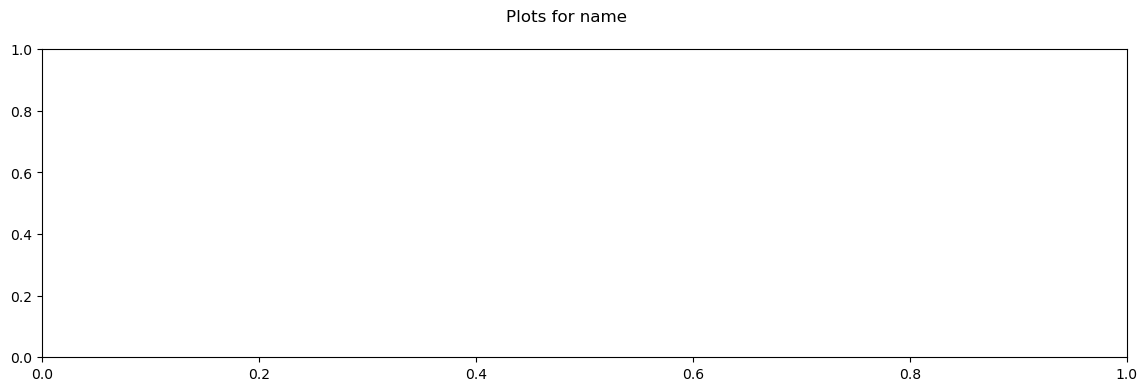

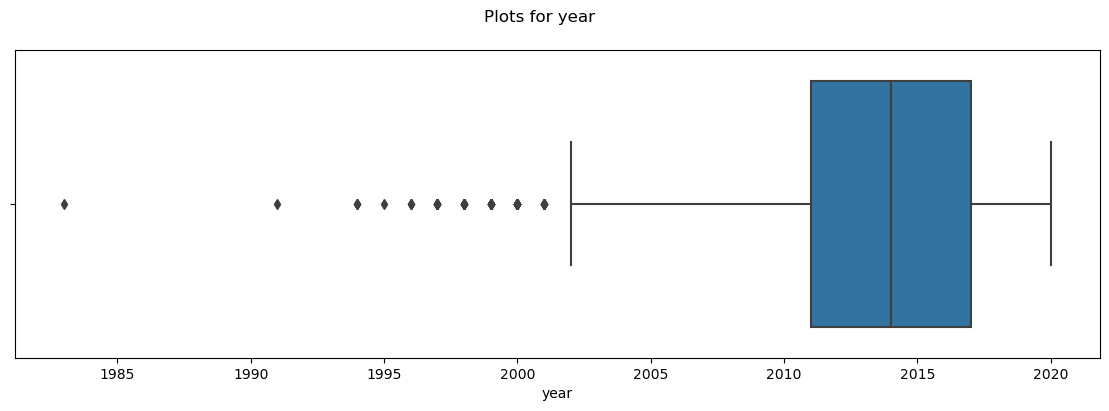

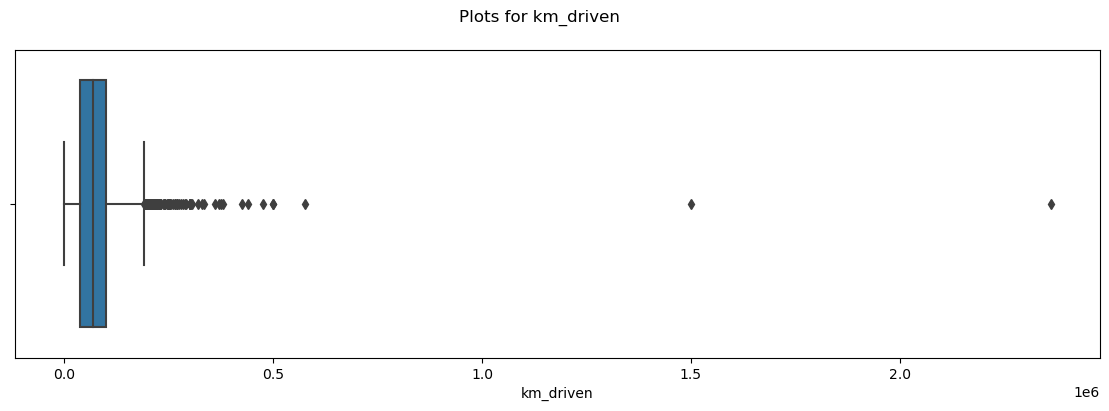

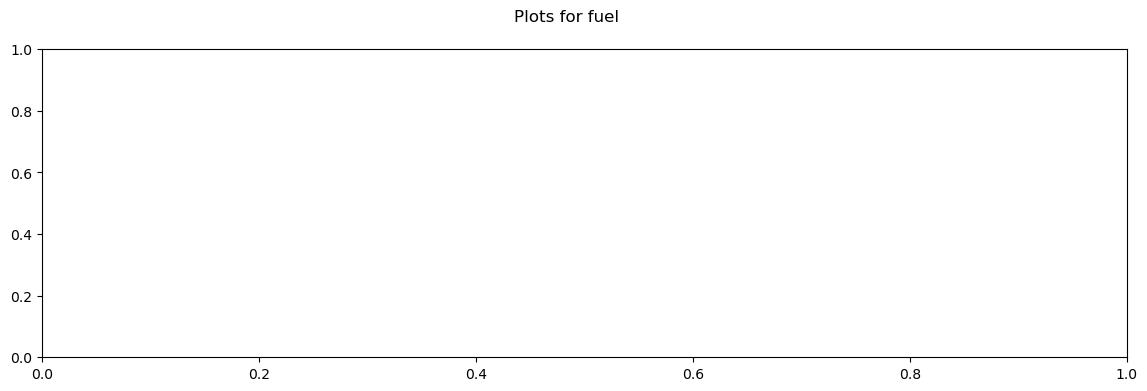

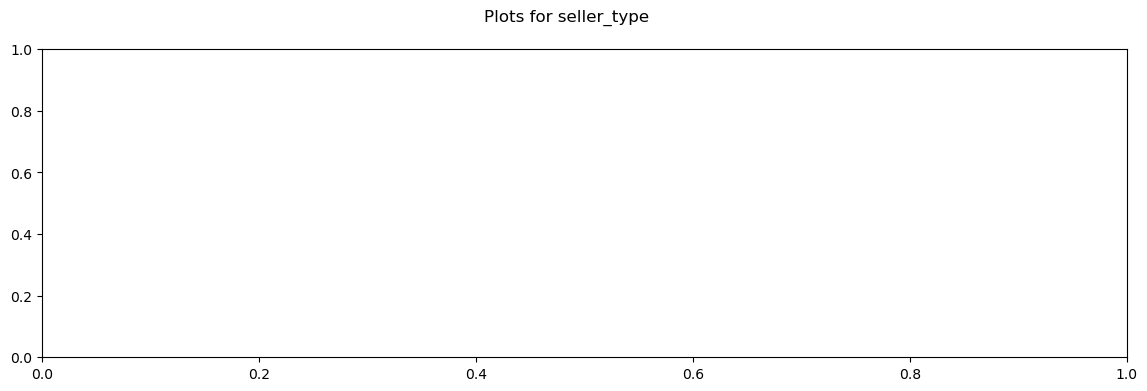

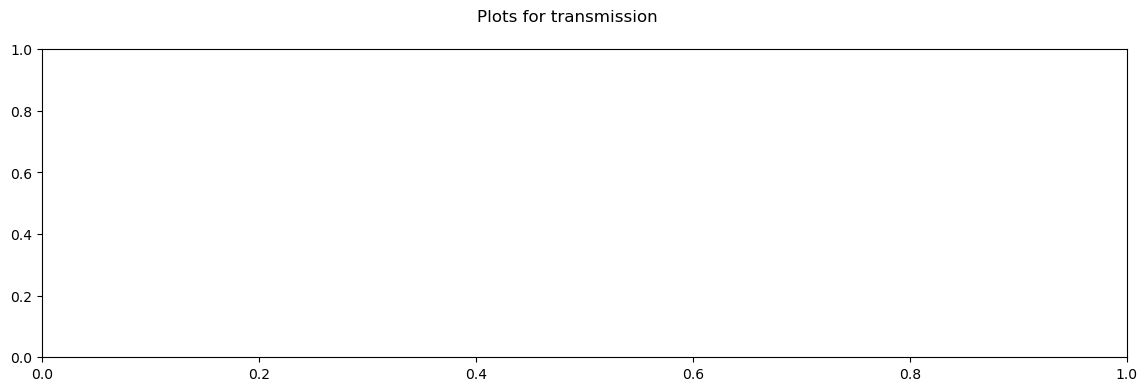

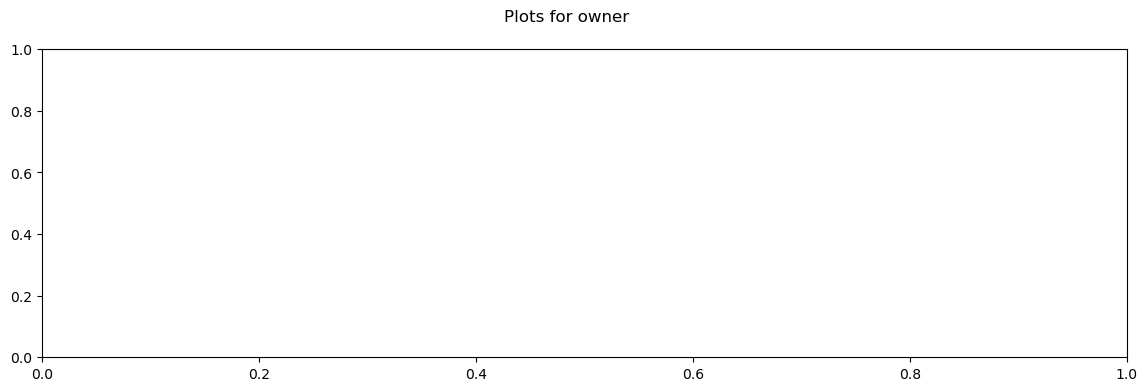

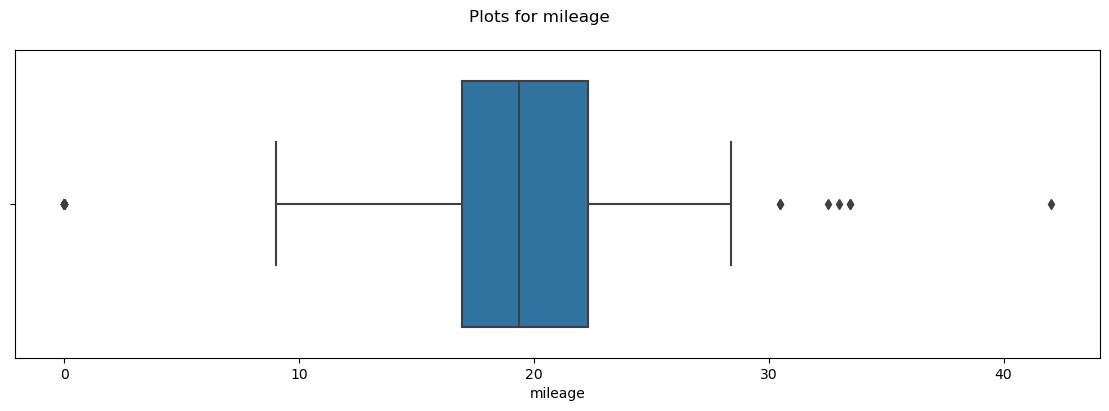

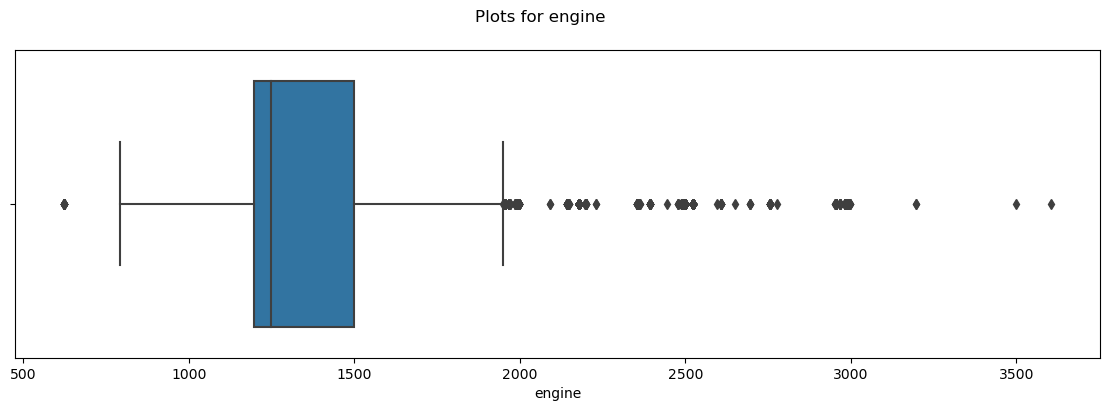

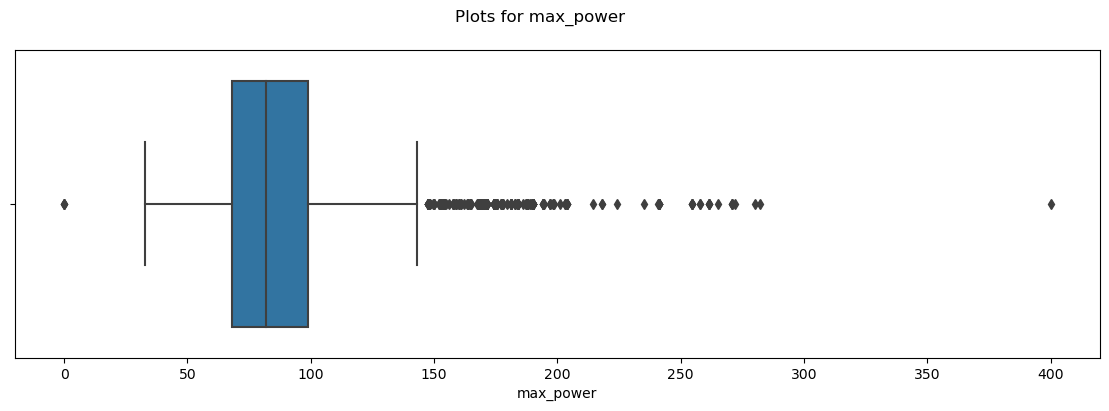

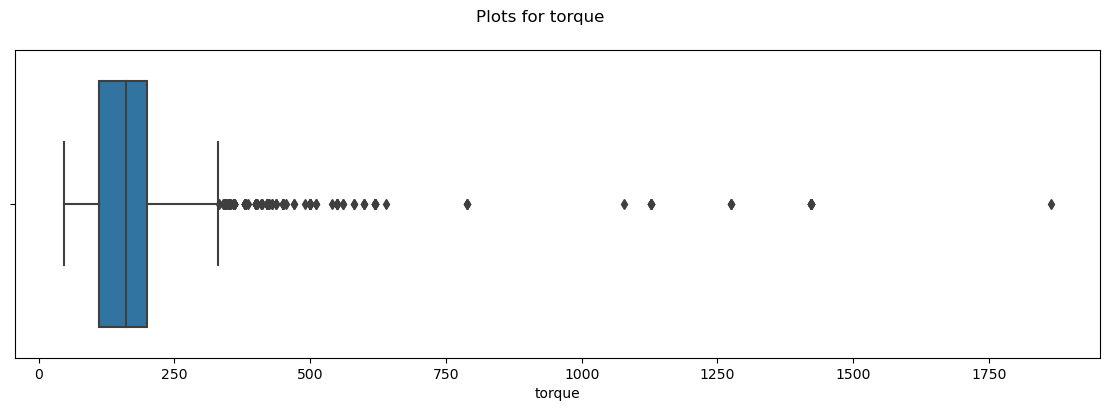

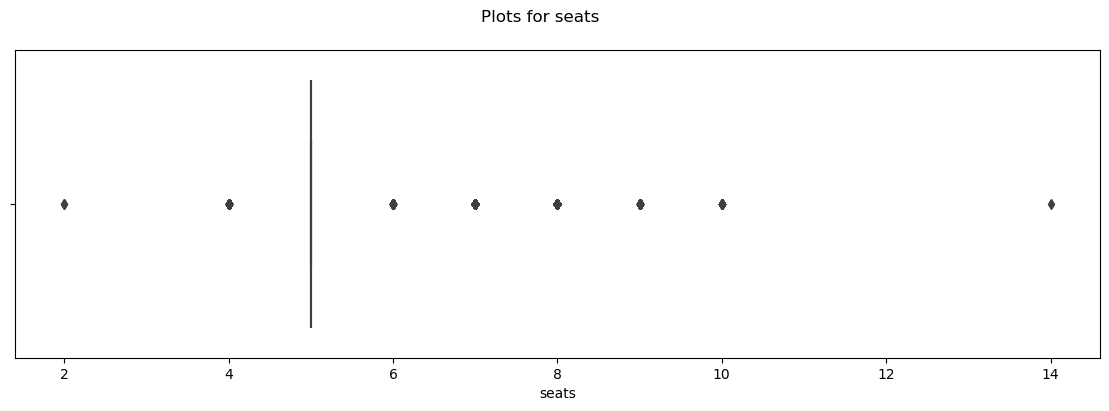

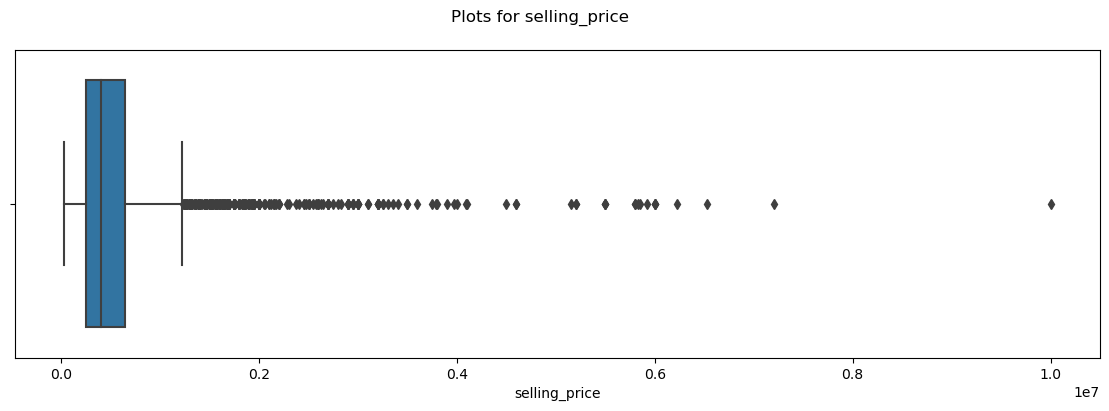

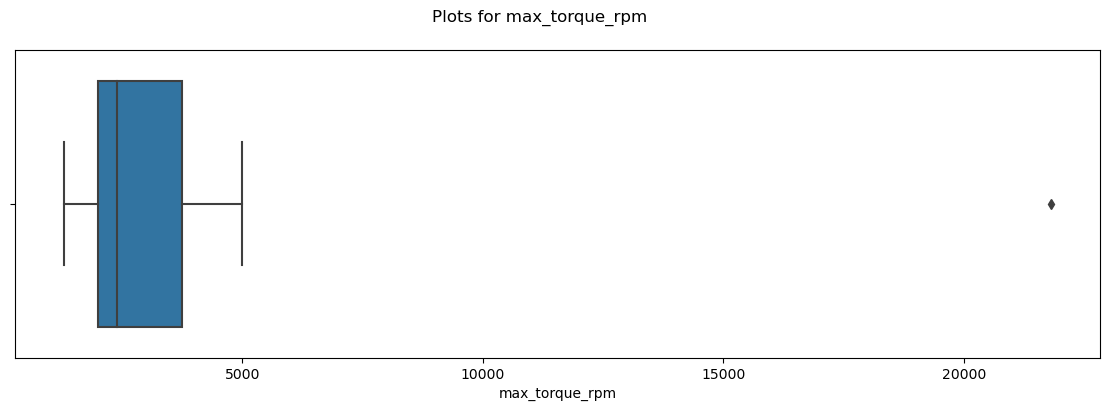

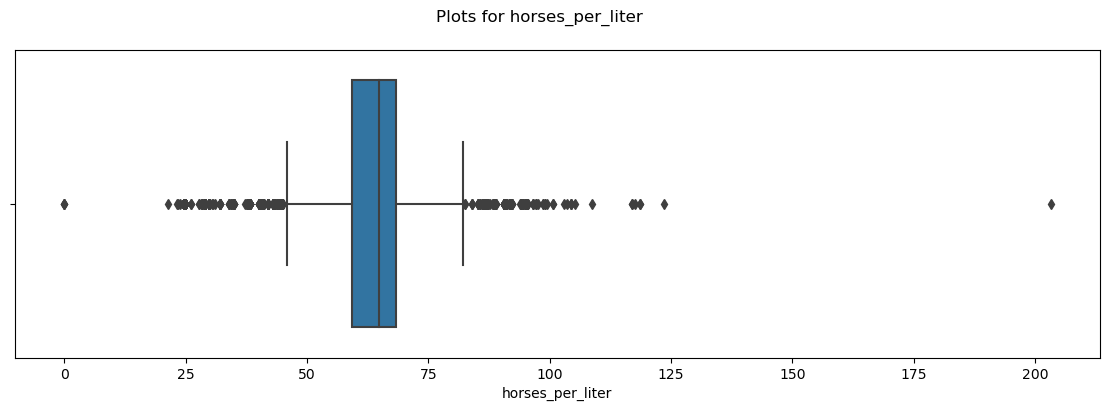

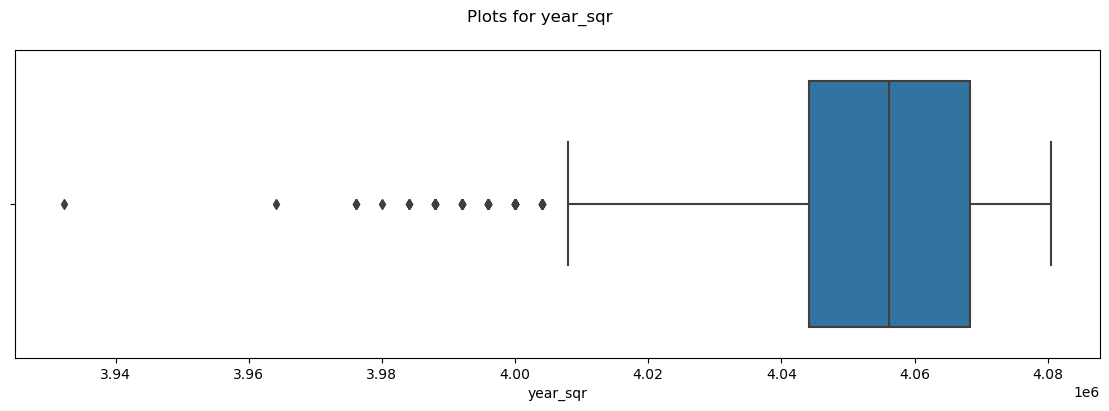

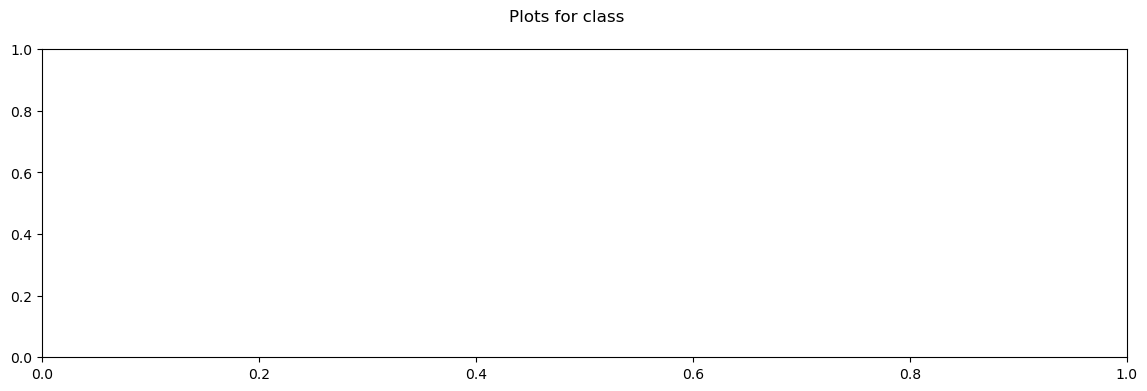

In [721]:
for col in df_featured.columns:  
    try:
      fig, ax1  =  plt.subplots(ncols = 1, figsize = (14,4));
      fig.suptitle('Plots for {}'.format(col));

      sns.boxplot(x = col , data = df_featured, ax = ax1);
    except:
      print(f'Boxplot cannot be plotted for {col} feature')
      continue

У некоторых признаков имеется довольно много выбросов. Но я не хочу их необдуманно трогать, так как, логично что обычных городских машин гораздо больше, чем каки-то эксклюзивных, спортивных и мощных, просто удаляя выбросы можно потерять информацию о нестандартных видах автомобилей.

* Посмотрим на распределение цен

До 2 млн

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

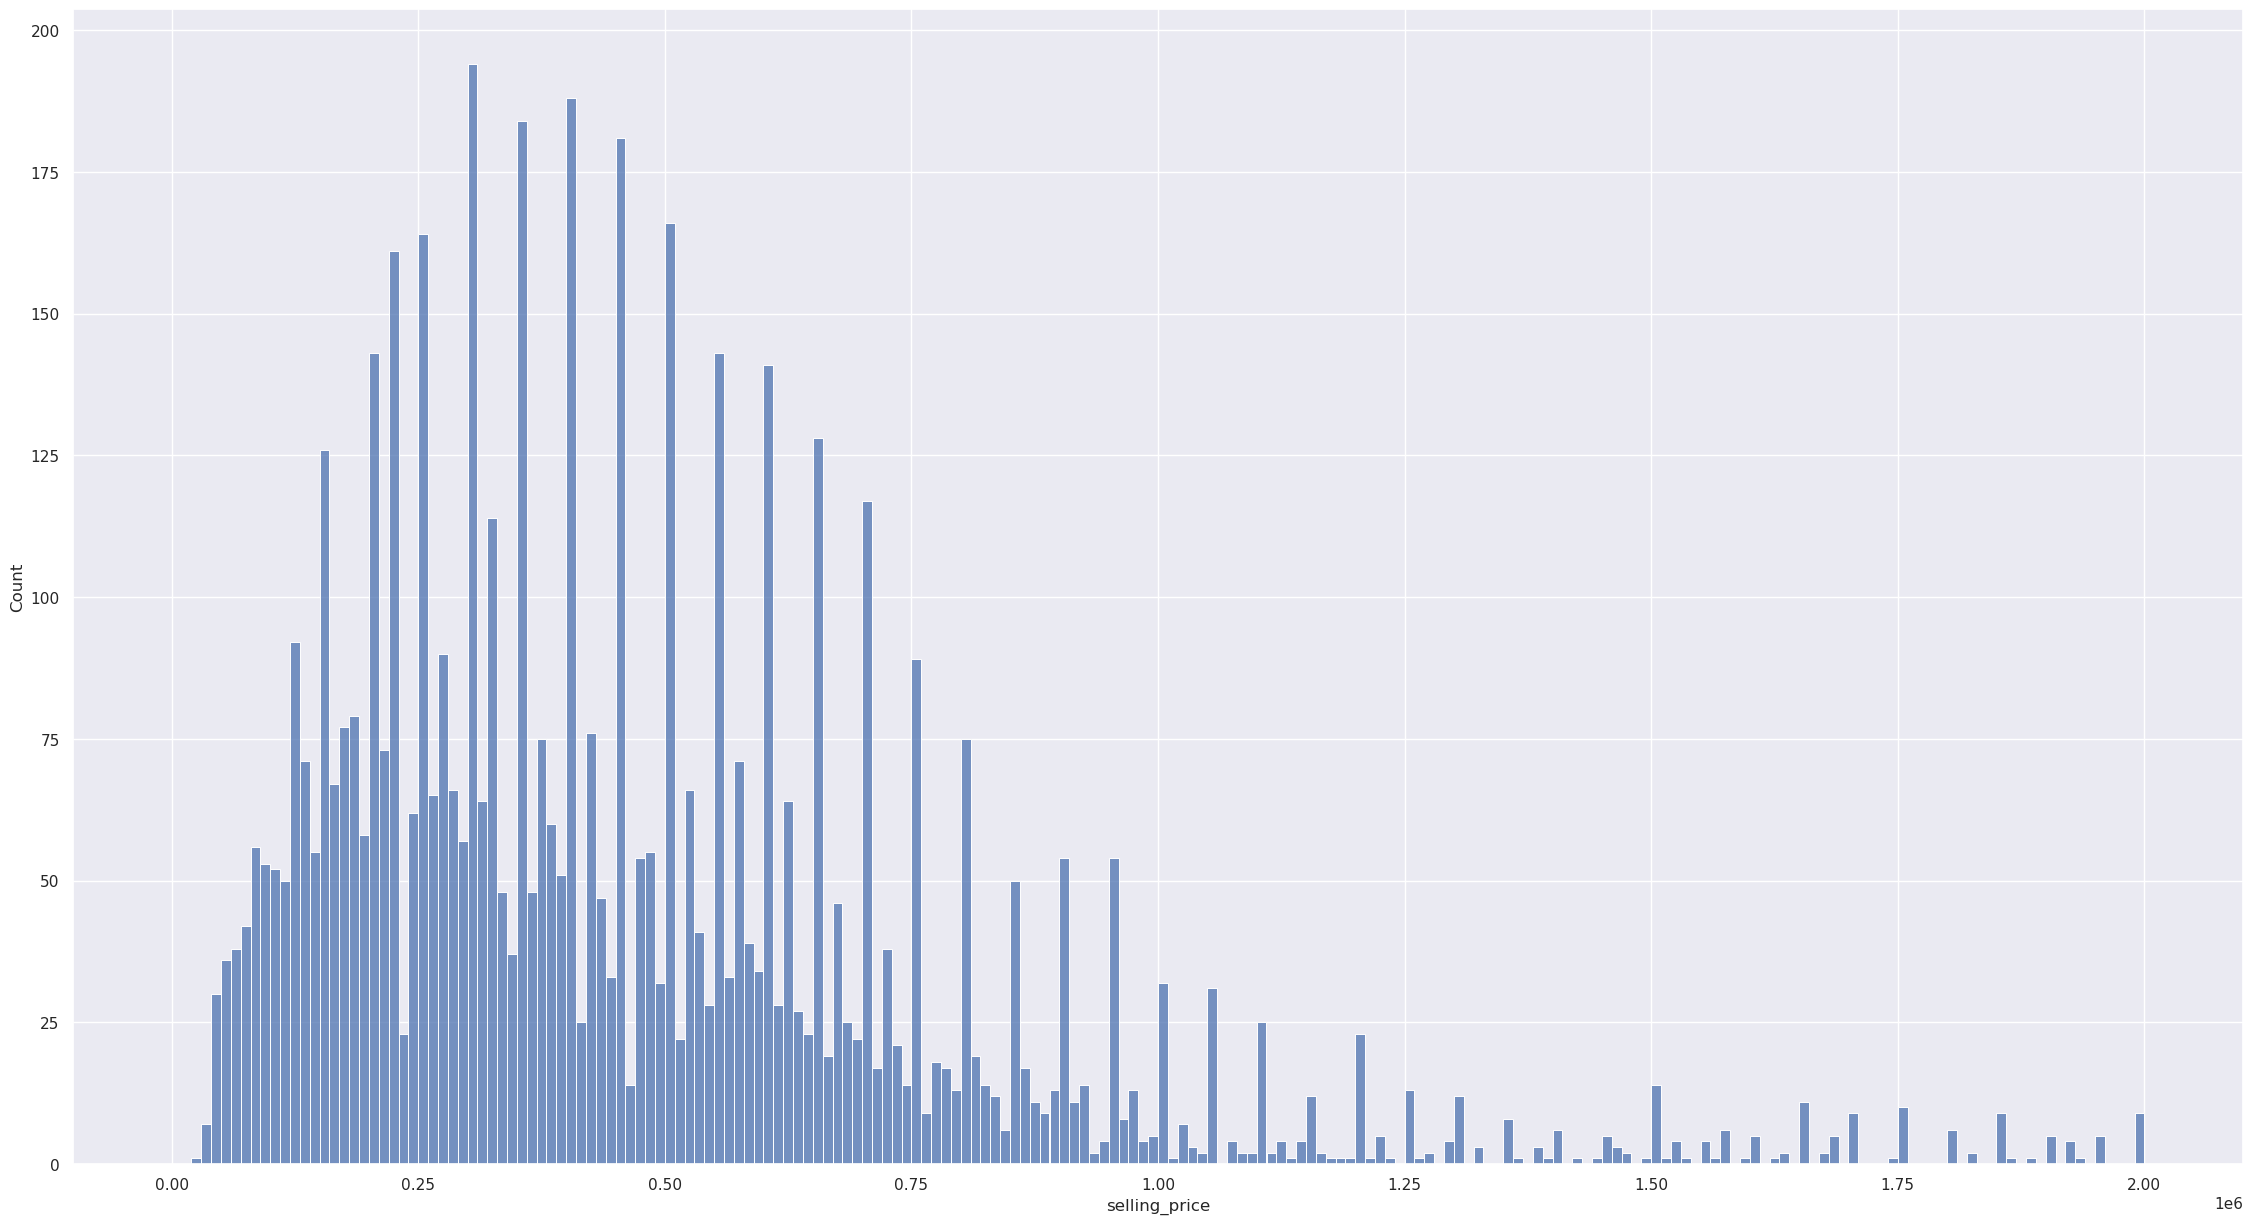

In [742]:
sns.set(rc={'figure.figsize':(28,15)})
sns.histplot(df_train, x='selling_price', binwidth=10000, binrange=(0,2000000))

Цены на автомобили любят числа, кратные 5000

От 2 млн

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

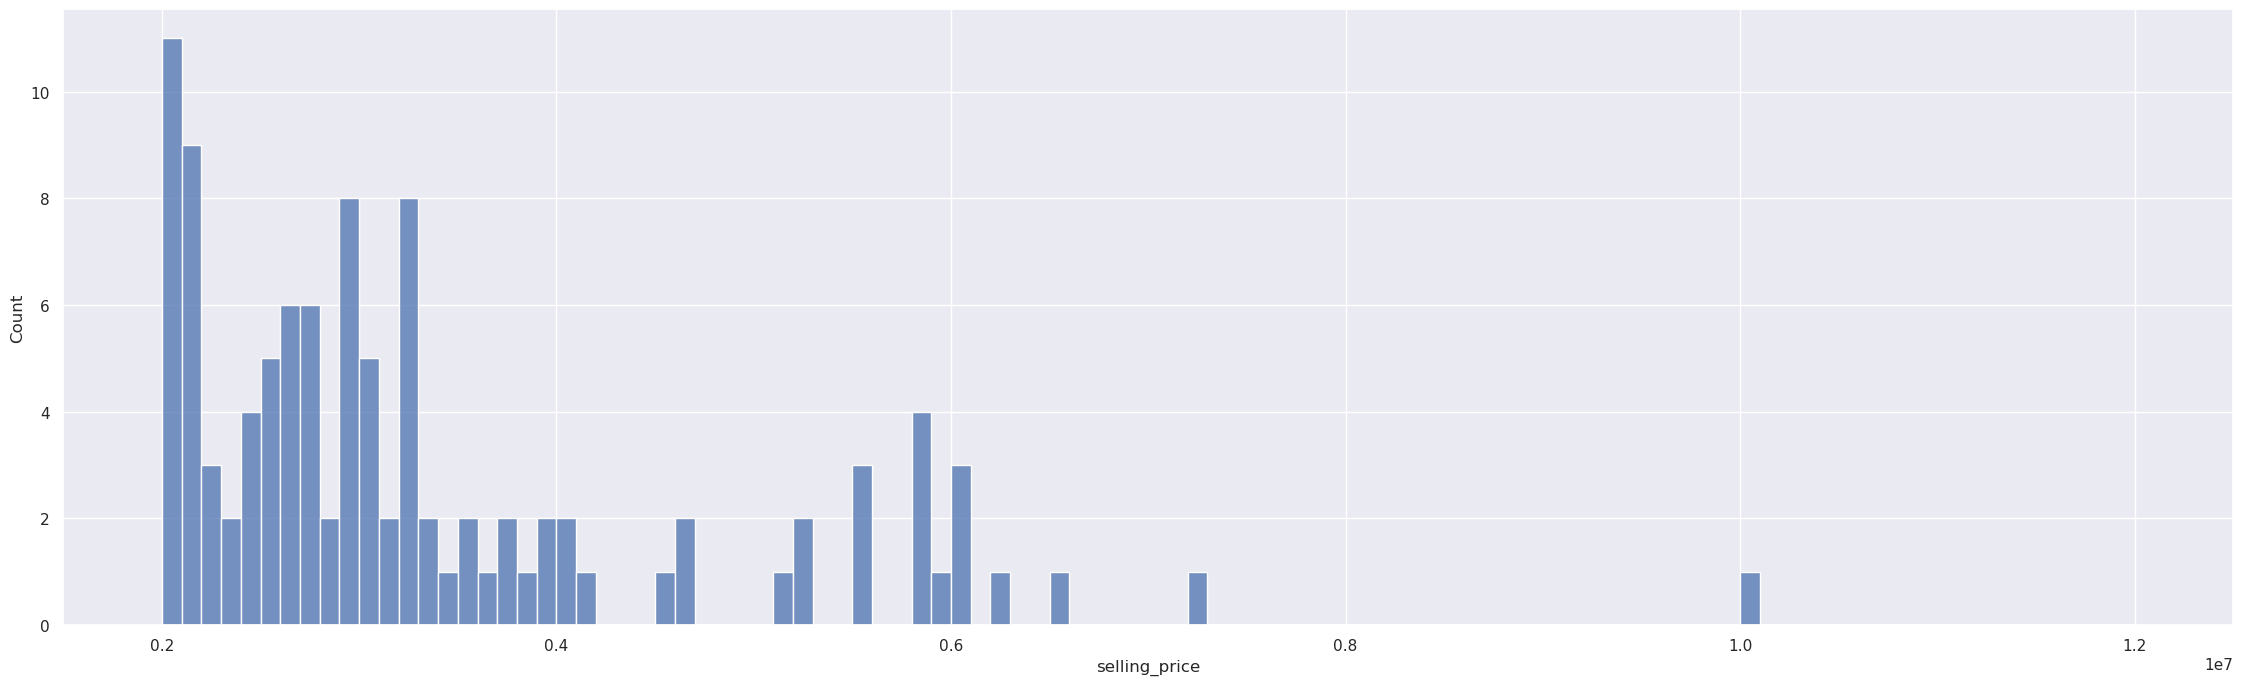

In [738]:
sns.set(rc={'figure.figsize':(28,8)})
sns.histplot(df_train, x='selling_price', binwidth=100000, binrange=(2000000,12000000))

Не вижу ничего необычного

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [193]:
def business_metrics(y_true, y_pred):
    
    numb_of_goog_pred = 0
    
    for i in range(len(y_true)):
        percent_difference = abs(100 - (y_pred[i] / y_true[i]) * 100)
        if percent_difference <= 10:
            numb_of_goog_pred += 1
    
    result = numb_of_goog_pred / len(y_true)
    return result

# для обычной регрессии

for_train = business_metrics(y_train, pred_train)
for_test = business_metrics(y_test, pred_test)

print(f'Доля для трейна: {for_train}')
print(f'Доля для теста: {for_test}')

Доля для трейна: 0.21643835616438356
Доля для теста: 0.227


In [194]:
# для ElasticNet-регрессии

for_train_elast = business_metrics(y_train, pred_elast_train)
for_test_elast = business_metrics(y_test, pred_elast_test)

print(f'Доля для трейна для ElasticNet-регрессии: {for_train_elast}')
print(f'Доля для теста для ElasticNet-регрессии: {for_test_elast}')

Доля для трейна для ElasticNet-регрессии: 0.22773972602739725
Доля для теста для ElasticNet-регрессии: 0.221


In [198]:
# для Lasso-регрессии c альфа=22810

for_train_lasso_2 = business_metrics(y_train, pred_lasso_2_train)
for_test_lasso_2 = business_metrics(y_test, pred_lasso_2_test)

print(f'Доля для трейна для Lasso-регрессии (c альфа 22810): {for_train_lasso_2}')
print(f'Доля для теста для Lasso-регрессии (c альфа 22810): {for_test_lasso_2}')

Доля для трейна для Lasso-регрессии (c альфа 22810): 0.2267123287671233
Доля для теста для Lasso-регрессии (c альфа 22810): 0.25


Для регресии с Lasso-регуляризацией самые хорошие показатели

Посмотрим результаты для данных с преобразованными категориальными признаками

In [199]:
for_train_dum = business_metrics(y_train, pred_train_dum_norm)
for_test_dum = business_metrics(y_test, pred_test_dum_norm)

print(f'Доля для трейна: {for_train_dum}')
print(f'Доля для теста: {for_test_dum}')

Доля для трейна: 0.21232876712328766
Доля для теста: 0.208


Показатели хуже! Хотя R2 для этих данных был выше: 
* 0.659 для трейна с преобразованными категориальными признаками
* 0.599 для теста с преобразованными категориальными признаками

и

* 0.60 для стандартного трейна
* 0.57 для стандартного теста

In [200]:
# для ElasticNet-регрессии

for_train_elast_dum = business_metrics(y_train, pred_elast_train_dum_norm)
for_test_elast_dum = business_metrics(y_test, pred_elast_test_dum_norm)

print(f'Доля для трейна для ElasticNet-регрессии: {for_train_elast_dum}')
print(f'Доля для теста для ElasticNet-регрессии: {for_test_elast_dum}')

Доля для трейна для ElasticNet-регрессии: 0.22277397260273973
Доля для теста для ElasticNet-регрессии: 0.203


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Для предсказания одного объекта возьмем веса линейной регрессии, обученной на нестандартизированных данных. 

Для предсказания файла с данными будем использовать ранее обученную модель регрессии с лассо-регуляризацией и альфа подобранной методом GridSearchCV

In [96]:
model = LinearRegression()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('Веса:')
[print(x) for x in model.coef_]

print('\nСвободный коэффициент:', model.intercept_)

Веса:
40432.4358490244
-0.8301428169347869
-2314.458297336113
35.06125902081527
10256.952369795561
66.83388836032381
-32809.48858710826
-64.0559416940728

Свободный коэффициент: -81381440.42943233


In [771]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

Сохраним необходимые данные в pickle

In [213]:
import pickle

all_important_info = {}

# Веса для линейной регрессии, обученной на нестандартизированных данных 
# Данные веса использованились для предсказания цены для одного объекта на Fastapi

w1_to_w8_for_regression =  model.coef_
w0_for_regression = model.intercept_

weights_for_regression = []
weights_for_regression.append(w0_for_regression)

for w in w1_to_w8_for_regression:
        weights_for_regression.append(w)

all_important_info['weights for regression'] = weights_for_regression
        
# веса для лассо-регрессии с альфа, используемые 
# для предсказания множества объектов на Fastapi

w1_to_w8_for_lasso_2 =  model_lasso_2.coef_
w0_for_lasso_2 = model_lasso_2.intercept_

weights_for_lasso_2 = []
weights_for_lasso_2.append(w0_for_lasso_2)

for w in w1_to_w8_for_lasso_2:
        weights_for_lasso_2.append(w)

all_important_info['weights for lasso with alpha'] = weights_for_lasso_2
        
# медианные значения

all_important_info['median of mileage'] = mileage_filler
all_important_info['median of engine'] = engine_filler 
all_important_info['median of max_power'] = max_power_filler
all_important_info['median of torque'] = torque_filler 
all_important_info['median of seats'] = seats_filler 
all_important_info['median of max_torque_rpm'] = max_torque_rpm_filler 

all_important_info
        
f = open(r'file.pickle', 'wb')
pickle.dump(all_important_info, f)
f.close()

In [203]:
w1_to_w8_for_lasso_2 =  model_lasso_2.coef_
w0_for_lasso_2 = model_lasso_2.intercept_

weights_for_lasso_2 = []
weights_for_lasso_2.append(w0_for_lasso_2)

for w in w1_to_w8_for_lasso_2:
        weights_for_lasso_2.append(w)

weights_for_lasso_2

[522960.09109588683,
 146865.2666721241,
 -26816.718087246303,
 0.0,
 0.0,
 320567.07584539836,
 0.0,
 -0.0,
 -32999.381071052536]

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link